In [1]:
class User:
    def __init__(self, name, label="none"): 
        self.id = name
        self.label = label
        self.advisors = [] #neighbors
        self.providers = []
        self.interactions = {}
        self.total_interactions = 0
        self.provider_raputation = {}
        self.advisor_reputation = {}
        self.decay = 1 #longitivity
        self.phi = 0.5 #w
        self.epsilon = 1 #uncertainity
        self.limit = 0 #tolarance limit
        self.alpha = 0.8 #consumer confidence
        self.satisfaction = {}
        self.disatisfaction = {}
        self.b_satisfaction = {}
        self.b_disatisfaction = {}
            
    def interact(self, provider, rating):
        if provider.id != self.id:
            if provider in self.providers:
                ratelist = self.interactions[provider]
            else:
                ratelist = []
                self.providers.append(provider)

            ratelist.append(rating)
            self.interactions[provider] = ratelist
            self.total_interactions += 1

            print("Consumer :"+str(self.id)+" rated Provider :"+str(provider.id)+" with "+str(rating))
#             self.eval_provider(provider, rating)
#             provider.eval_provider(provider, rating, bayes = True)
        else:
            print('I cant interact with myself')
        
        
    def eval_provider(self, provider, rating, bayes = False):
        exp_val_n = len(self.interactions[provider])

        rj = (1- rating) * self.phi #disatisfaction self.phi = w, rj = ds
        sj = (1+ rating) * self.phi #satisfaction self.phi = w  sj = sj
        
        if bayes:
            print("Bayes Consumer :"+str(self.id)+" evaluates Provider :"+str(provider.id)+" satisfaction: "+str(sj)+ "disatisfaction :"+str(rj))
            if provider in self.b_satisfaction:
                cumilative_satisfaction = self.b_satisfaction[provider]
                cumilative_disatisfaction = self.b_disatisfaction[provider]
                cumilative_satisfaction += sj
                cumilative_disatisfaction += rj
            else:
                cumilative_satisfaction = sj
                cumilative_disatisfaction = rj
            self.b_satisfaction[provider] = cumilative_satisfaction
            self.b_disatisfaction[provider] = cumilative_disatisfaction
        else:
            decay_factor = self.decay **(exp_val_n - self.limit)
            rj *= decay_factor
            sj *= decay_factor
            self.limit += 1
            print("Consumer :"+str(self.id)+" evaluates Provider :"+str(provider.id)+" satisfaction: "+str(sj)+ "disatisfaction :"+str(rj))
            if provider in self.satisfaction:
                cumilative_satisfaction = self.satisfaction[provider]
                cumilative_disatisfaction = self.disatisfaction[provider]
                cumilative_satisfaction += sj
                cumilative_disatisfaction +=rj
            else:
                cumilative_satisfaction = sj
                cumilative_disatisfaction = rj
            self.satisfaction[provider] = cumilative_satisfaction
            self.disatisfaction[provider] = cumilative_disatisfaction
        
        print("Consumer :"+str(self.id)+"'s current satisfaction and disatisfaction for Provider :"+str(provider.id)+" are : "+str(cumilative_satisfaction)+ " :"+str(cumilative_disatisfaction))
        self.get_belief(provider)
    
    def get_belief(self, provider):
            cum_sat = self.satisfaction[provider]
            cum_dis = self.disatisfaction[provider]
            total_sat_dit = cum_dis+cum_sat
            den = total_sat_dit + self.epsilon 
            print(total_sat_dit)
            belief = cum_sat /(den)
            disbelief = cum_dis /(den)
            uncertainity = self.epsilon / (den)
            
#             print("Consumer :"+str(self.id)+"'s current belief,disbelief, and uncertainity for Provider :"+str(provider.id)+" are : "+str(belief)+ " :"+str(disbelief)+ " : "+str(uncertainity))
#             print("Sanitycheck add all :"+str((belief + disbelief + uncertainity)))
        
            return belief, disbelief, uncertainity
        
        
    def provider_raputation(self, provider):
        return provider_raputation[provider]
    
    def get_providers(self):
        return self.providers
        
#     def get_similarity(self, advisor):
#         print('My providers are :'+str([x.id for x in self.get_providers()]))
#         print('Advisor providers are :'+str([x.id for x in advisor.get_providers()]))
#         ishere = True if advisor in self.advisors else False
#         print('Advisor'+str(advisor.id)+' is in :'+str(ishere))
        
#         if advisor in self.advisors:
#             cum_dist = 0
#             comm_vendors = 0
#             similarity = -1 #TODO 
#             for p in advisor.providers:
#                 if p in self.providers:
#                     comm_vendors += 1
#                     a_bel, a_disbel, a_unc = self.get_belief(p)
#                     b_bel, b_disbel, b_unc = advisor.get_belief(p)
#                     nonsqrt=((a_bel - b_bel)**2) + ((a_disbel - b_disbel)**2) + ((a_unc - b_unc)**2)
#                     dist = nonsqrt** (1/2)
#                     dist = dist/2
#                     cum_dist += dist
#             if comm_vendors > 0:
#                 meanormilsed_distance = cum_dist/comm_vendors
#                 similarity = 1 - meanormilsed_distance
#                 print("Consumer :"+str(self.id)+" similarity with advisor :"+str(advisor.id)+" is "+str(similarity)+", nmd is "+str(meanormilsed_distance))
#             return similarity

    def get_similarity(self, advisor):
#         print('My providers are :'+str([x.id for x in self.get_providers()]))
#         print('Advisor providers are :'+str([x.id for x in advisor.get_providers()]))
#         ishere = True if advisor in self.advisors else False
#         print('Advisor'+str(advisor.id)+' is in :'+str(ishere))
#         print([x.id for x in advisor.get_providers() if x in self.get_providers()])
        
        common_providers = [x for x in advisor.get_providers() if x in self.get_providers()]
        similarity = -100 #note this is just for checking if the advisor has a common vendor
        
        if len(common_providers) > 0:
            cum_dist = 0
            for p in common_providers:
                    
                    a_bel, a_disbel, a_unc = self.get_belief(p)
                    b_bel, b_disbel, b_unc = advisor.get_belief(p)
                    nonsqrt= self.get_distance(advisor, p)
                    dist = nonsqrt** (1/2)
                    dist = dist/(2**(1/2))
                    cum_dist += dist
            meanormilsed_distance = cum_dist/len(common_providers)
            similarity = 1 - meanormilsed_distance
#             print("Consumer :"+str(self.id)+" similarity with advisor :"+str(advisor.id)+" is "+str(similarity)+", nmd is "+str(meanormilsed_distance))
        return similarity
    
    def get_distance(self, advisor, p):
        a_bel, a_disbel, a_unc = self.get_belief(p)
        b_bel, b_disbel, b_unc = advisor.get_belief(p)
        nonsqrt=((a_bel - b_bel)**2) + ((a_disbel - b_disbel)**2) + ((a_unc - b_unc)**2)
#         print('ED('+str(p.id)+'_,'+str(self.id)+') = '+str(nonsqrt))
        return nonsqrt
            
#     def get_honesty(self,initr = 0.00001,inits = 0.00001):
#         cum_sat = 0;
#         cum_dis = 0;
#         print(self)
#         for p in self.providers:
#             print(p.satisfaction[self])
#             cum_sat += p.satisfaction[self]
#             cum_dis += p.disatisfaction[self]
#         return (initr + cum_sat) / (initr + inits + cum_sat + cum_dis)
    
    def get_global_crediblity(self):
        cum_bel = 0;
        for p in self.providers:
            b ,_ , _ = p.get_belief(self)
            cum_bel += b
        return cum_bel/len(self.providers)
            
    
    def set_adivsors(self, neigbors):
        self.advisors = neigbors
    def add_an_adivsor(self, neigbor):
        self.advisors.append(neigbor)
    
    def get_id(self):
        self.id
    
#     def bayes(self, provider, initr = 0.0001, inits = 0.00001):
#         cum_sat = self.satisfaction[provider]
#         cum_dis = self.disatisfaction[provider]
#         return (initr + cum_sat) / (initr + inits + cum_sat + cum_dis)
  

    # any rating wich is greater than divider is positvie else negative
    # bayes_org only considers objevtive reputation
    # bayes_org = 1 + all_pos/ 2 + (all_pos+ all_neg)
    def my_bayes(self, p):
        sat = 0
        dis = 0
        if p in self.b_satisfaction:
            sat = self.b_satisfaction[p]
            dis = self.b_disatisfaction[p]
        return sat, dis
    
#     def reputation(self, provider, alpha=0.2):
#         rep = 0
#         hon = 0
#         rep_count = 0
#         hon_count = 0
#         for a in provider.get_providers(): #cusotomers (advisor) who had interacted with producer
#             ap_bel, _, _ = a.get_belief(provider)
#             if a in self.advisors:
#                 sim = self.get_similarity(a)
#                 if sim != -1:
#                     rep += (ap_bel * sim)
#                     rep_count += 1
#             else:
#                 a_hon = a.get_honesty()
#                 hon += (ap_bel * a_hon)
#                 hon_count += 1
        
#         reputation = 0
#         if rep_count > 0:
#             reputation = (alpha * rep)/rep_count

#         if hon_count > 0:
#             reputation += ((1 - alpha) * hon)/hon_count
#         return reputation
    
    def p_g_reputation(self, provider, all_advisors, filter_threshold = 0.5):
        sim_count = 0
        gc_count = 0
        p_rep = 0
        g_rep = 0
        for a in all_advisors:
            if a.id != self.id:
                ap_bel, _, _ = a.get_belief(provider)
                sim = self.get_similarity(a)
                if sim != -100: #meaning have no common vendos
                    sim_count += 1
                    if sim > filter_threshold:
                        p_rep += (sim * ap_bel)
                else:
                    gc = a.get_global_crediblity()
                    g_rep += (gc * ap_bel)
        print('personilsed_reputaion: '+str(p_rep)+' g_rep: '+str(g_rep))
        reputation = 0
        
        if sim_count > 0:
            reputation = (self.alpha * p_rep)/sim_count

        if (len(all_advisors) - sim_count) > 0:
            reputation += ((1 - self.alpha) * g_rep)/(len(all_advisors) - sim_count)
        return reputation
        
    
    def init_trust(provider, beta=0.5, trust_propensity=0.5):
        rep = self.reputation(provider)
        return (beta * trust_propensity ) + ((1-beta) * rep)
    
    def trust_T(df,initT, beta=0.5):
        t = self.init_trust(provider)
        b, d, u = self.get_belief(provider)
        trust = b + (t * u)
        trust_dash = d + ((1 - t) * u)
        print("Sum test ="+str(trust + trust_dash))
        return trust
        

In [2]:
class Consumer(User):
    def __init__(self, name, label="C"):
        User.__init__(self,name, label)
        

class Producer(User):
    def __init__(self, name, label="P"):
        User.__init__(self,name, label)

# class Advisor(Users):
#     def __init__(self, name):
#         Users.__init__(self,name)

In [3]:
l_consumers = {}
l_producers = {}
consumer_id_start_range = 100
producer_id_start_range = 200
for x in range(11):
    print(consumer_id_start_range+x)
    name ='C'+str(x+1)
    c = Consumer(consumer_id_start_range+x, name)
    l_consumers[consumer_id_start_range+x] = c
    if x % 2 == 0:
        print(producer_id_start_range+x)
        p = Producer(producer_id_start_range+x)
        l_producers[producer_id_start_range+x] = p
    

100
200
101
102
202
103
104
204
105
106
206
107
108
208
109
110
210


In [4]:
len(l_consumers)

11

In [5]:
def rategen(goodn, badn, co, pr):  
    for g in range(goodn):
        print('========Goood loop===='+str(g+1))
        co.interact(pr, -1)
        co.eval_provider(pr, -1)
        co.eval_provider(pr, -1, bayes=True)

        pr.interact(co, 1)
        pr.eval_provider(co, 1)

    for i in range(badn):
        print('========Bad loop===='+str(i+1))
        co.interact(pr, -1)
        co.eval_provider(pr, -1)
        co.eval_provider(pr, -1, bayes=True)

        pr.interact(co, -1)
        pr.eval_provider(co, -1)

In [6]:
c1 = l_consumers[100]
x = l_producers[200]

for i in range(15):
    print('======i count'+str(i+1))
    c1.interact(x, 1)
    c1.eval_provider(x, 1)
    c1.eval_provider(x, 1, bayes=True)
    
    x.interact(c1, 1)
    x.eval_provider(c1, 1)

======i count1
Consumer :100 rated Provider :200 with 1
Consumer :100 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :100's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Bayes Consumer :100 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :100's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Consumer :200 rated Provider :100 with 1
Consumer :200 evaluates Provider :100 satisfaction: 1.0disatisfaction :0.0
Consumer :200's current satisfaction and disatisfaction for Provider :100 are : 1.0 :0.0
1.0
======i count2
Consumer :100 rated Provider :200 with 1
Consumer :100 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :100's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0
2.0
Bayes Consumer :100 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :100's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0

In [7]:
c1 = l_consumers[100]
y = l_producers[202]
rategen(1, 9, c1, y)

========Goood loop====1
Consumer :100 rated Provider :202 with -1
Consumer :100 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :202 are : 0.0 :1.0
1.0
Bayes Consumer :100 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :202 are : 0.0 :1.0
1.0
Consumer :202 rated Provider :100 with 1
Consumer :202 evaluates Provider :100 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :100 are : 1.0 :0.0
1.0
========Bad loop====1
Consumer :100 rated Provider :202 with -1
Consumer :100 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :202 are : 0.0 :2.0
2.0
Bayes Consumer :100 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :

In [8]:
z = l_producers[204]
rategen(2, 8, c1, z)

========Goood loop====1
Consumer :100 rated Provider :204 with -1
Consumer :100 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :204 are : 0.0 :1.0
1.0
Bayes Consumer :100 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :204 are : 0.0 :1.0
1.0
Consumer :204 rated Provider :100 with 1
Consumer :204 evaluates Provider :100 satisfaction: 1.0disatisfaction :0.0
Consumer :204's current satisfaction and disatisfaction for Provider :100 are : 1.0 :0.0
1.0
========Goood loop====2
Consumer :100 rated Provider :204 with -1
Consumer :100 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :204 are : 0.0 :2.0
2.0
Bayes Consumer :100 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider

In [9]:
u = l_producers[206]
rategen(1, 9, c1, u)

========Goood loop====1
Consumer :100 rated Provider :206 with -1
Consumer :100 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :206 are : 0.0 :1.0
1.0
Bayes Consumer :100 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :206 are : 0.0 :1.0
1.0
Consumer :206 rated Provider :100 with 1
Consumer :206 evaluates Provider :100 satisfaction: 1.0disatisfaction :0.0
Consumer :206's current satisfaction and disatisfaction for Provider :100 are : 1.0 :0.0
1.0
========Bad loop====1
Consumer :100 rated Provider :206 with -1
Consumer :100 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :206 are : 0.0 :2.0
2.0
Bayes Consumer :100 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :

In [10]:
v = l_producers[208]
rategen(2, 8, c1, v)

========Goood loop====1
Consumer :100 rated Provider :208 with -1
Consumer :100 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :208 are : 0.0 :1.0
1.0
Bayes Consumer :100 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :208 are : 0.0 :1.0
1.0
Consumer :208 rated Provider :100 with 1
Consumer :208 evaluates Provider :100 satisfaction: 1.0disatisfaction :0.0
Consumer :208's current satisfaction and disatisfaction for Provider :100 are : 1.0 :0.0
1.0
========Goood loop====2
Consumer :100 rated Provider :208 with -1
Consumer :100 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider :208 are : 0.0 :2.0
2.0
Bayes Consumer :100 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :100's current satisfaction and disatisfaction for Provider

In [11]:
c2 = l_consumers[101]

for i in range(15):
    c2.interact(x, 1)
    c2.eval_provider(x, 1)
    c2.eval_provider(x, 1, bayes=True)
    
    x.interact(c2, 1)
    x.eval_provider(c2, 1)

Consumer :101 rated Provider :200 with 1
Consumer :101 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :101's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Bayes Consumer :101 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :101's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Consumer :200 rated Provider :101 with 1
Consumer :200 evaluates Provider :101 satisfaction: 1.0disatisfaction :0.0
Consumer :200's current satisfaction and disatisfaction for Provider :101 are : 1.0 :0.0
1.0
Consumer :101 rated Provider :200 with 1
Consumer :101 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :101's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0
2.0
Bayes Consumer :101 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :101's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0
2.0
Consumer :200 rated Provi

In [12]:
rategen(1, 9, c2, y)

========Goood loop====1
Consumer :101 rated Provider :202 with -1
Consumer :101 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :202 are : 0.0 :1.0
1.0
Bayes Consumer :101 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :202 are : 0.0 :1.0
1.0
Consumer :202 rated Provider :101 with 1
Consumer :202 evaluates Provider :101 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :101 are : 1.0 :0.0
1.0
========Bad loop====1
Consumer :101 rated Provider :202 with -1
Consumer :101 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :202 are : 0.0 :2.0
2.0
Bayes Consumer :101 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :

In [13]:
rategen(1, 9, c2, z)

========Goood loop====1
Consumer :101 rated Provider :204 with -1
Consumer :101 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :204 are : 0.0 :1.0
1.0
Bayes Consumer :101 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :204 are : 0.0 :1.0
1.0
Consumer :204 rated Provider :101 with 1
Consumer :204 evaluates Provider :101 satisfaction: 1.0disatisfaction :0.0
Consumer :204's current satisfaction and disatisfaction for Provider :101 are : 1.0 :0.0
1.0
========Bad loop====1
Consumer :101 rated Provider :204 with -1
Consumer :101 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :204 are : 0.0 :2.0
2.0
Bayes Consumer :101 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :

In [14]:
rategen(2, 8, c2, u)

========Goood loop====1
Consumer :101 rated Provider :206 with -1
Consumer :101 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :206 are : 0.0 :1.0
1.0
Bayes Consumer :101 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :206 are : 0.0 :1.0
1.0
Consumer :206 rated Provider :101 with 1
Consumer :206 evaluates Provider :101 satisfaction: 1.0disatisfaction :0.0
Consumer :206's current satisfaction and disatisfaction for Provider :101 are : 1.0 :0.0
1.0
========Goood loop====2
Consumer :101 rated Provider :206 with -1
Consumer :101 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :206 are : 0.0 :2.0
2.0
Bayes Consumer :101 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider

In [15]:
rategen(2, 8, c2, v)

========Goood loop====1
Consumer :101 rated Provider :208 with -1
Consumer :101 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :208 are : 0.0 :1.0
1.0
Bayes Consumer :101 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :208 are : 0.0 :1.0
1.0
Consumer :208 rated Provider :101 with 1
Consumer :208 evaluates Provider :101 satisfaction: 1.0disatisfaction :0.0
Consumer :208's current satisfaction and disatisfaction for Provider :101 are : 1.0 :0.0
1.0
========Goood loop====2
Consumer :101 rated Provider :208 with -1
Consumer :101 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider :208 are : 0.0 :2.0
2.0
Bayes Consumer :101 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :101's current satisfaction and disatisfaction for Provider

In [16]:
# rategen(1, 9, c2, y)

In [17]:
c3 = l_consumers[102]

for i in range(15):
    c3.interact(x, 1)
    c3.eval_provider(x, 1)
    c3.eval_provider(x, 1, bayes=True)
    
    x.interact(c3, 1)
    x.eval_provider(c3, 1)

Consumer :102 rated Provider :200 with 1
Consumer :102 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :102's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Bayes Consumer :102 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :102's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Consumer :200 rated Provider :102 with 1
Consumer :200 evaluates Provider :102 satisfaction: 1.0disatisfaction :0.0
Consumer :200's current satisfaction and disatisfaction for Provider :102 are : 1.0 :0.0
1.0
Consumer :102 rated Provider :200 with 1
Consumer :102 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :102's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0
2.0
Bayes Consumer :102 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :102's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0
2.0
Consumer :200 rated Provi

In [18]:
rategen(2, 8, c3, y)

========Goood loop====1
Consumer :102 rated Provider :202 with -1
Consumer :102 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :202 are : 0.0 :1.0
1.0
Bayes Consumer :102 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :202 are : 0.0 :1.0
1.0
Consumer :202 rated Provider :102 with 1
Consumer :202 evaluates Provider :102 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :102 are : 1.0 :0.0
1.0
========Goood loop====2
Consumer :102 rated Provider :202 with -1
Consumer :102 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :202 are : 0.0 :2.0
2.0
Bayes Consumer :102 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider

In [19]:
rategen(2, 8, c3, z)

========Goood loop====1
Consumer :102 rated Provider :204 with -1
Consumer :102 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :204 are : 0.0 :1.0
1.0
Bayes Consumer :102 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :204 are : 0.0 :1.0
1.0
Consumer :204 rated Provider :102 with 1
Consumer :204 evaluates Provider :102 satisfaction: 1.0disatisfaction :0.0
Consumer :204's current satisfaction and disatisfaction for Provider :102 are : 1.0 :0.0
1.0
========Goood loop====2
Consumer :102 rated Provider :204 with -1
Consumer :102 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :204 are : 0.0 :2.0
2.0
Bayes Consumer :102 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider

In [20]:
rategen(1, 9, c3, u)

========Goood loop====1
Consumer :102 rated Provider :206 with -1
Consumer :102 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :206 are : 0.0 :1.0
1.0
Bayes Consumer :102 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :206 are : 0.0 :1.0
1.0
Consumer :206 rated Provider :102 with 1
Consumer :206 evaluates Provider :102 satisfaction: 1.0disatisfaction :0.0
Consumer :206's current satisfaction and disatisfaction for Provider :102 are : 1.0 :0.0
1.0
========Bad loop====1
Consumer :102 rated Provider :206 with -1
Consumer :102 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :206 are : 0.0 :2.0
2.0
Bayes Consumer :102 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :

In [21]:
rategen(2, 8, c3, v)

========Goood loop====1
Consumer :102 rated Provider :208 with -1
Consumer :102 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :208 are : 0.0 :1.0
1.0
Bayes Consumer :102 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :208 are : 0.0 :1.0
1.0
Consumer :208 rated Provider :102 with 1
Consumer :208 evaluates Provider :102 satisfaction: 1.0disatisfaction :0.0
Consumer :208's current satisfaction and disatisfaction for Provider :102 are : 1.0 :0.0
1.0
========Goood loop====2
Consumer :102 rated Provider :208 with -1
Consumer :102 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider :208 are : 0.0 :2.0
2.0
Bayes Consumer :102 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :102's current satisfaction and disatisfaction for Provider

In [22]:
#c4, x
c4 = l_consumers[103]

for i in range(15):
    c4.interact(x, 1)
    c4.eval_provider(x, 1)
    c4.eval_provider(x, 1, bayes=True)
    
    x.interact(c4, 1)
    x.eval_provider(c4, 1)

Consumer :103 rated Provider :200 with 1
Consumer :103 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :103's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Bayes Consumer :103 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :103's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Consumer :200 rated Provider :103 with 1
Consumer :200 evaluates Provider :103 satisfaction: 1.0disatisfaction :0.0
Consumer :200's current satisfaction and disatisfaction for Provider :103 are : 1.0 :0.0
1.0
Consumer :103 rated Provider :200 with 1
Consumer :103 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :103's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0
2.0
Bayes Consumer :103 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :103's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0
2.0
Consumer :200 rated Provi

In [23]:
rategen(1, 9, c4, y)

========Goood loop====1
Consumer :103 rated Provider :202 with -1
Consumer :103 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :202 are : 0.0 :1.0
1.0
Bayes Consumer :103 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :202 are : 0.0 :1.0
1.0
Consumer :202 rated Provider :103 with 1
Consumer :202 evaluates Provider :103 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :103 are : 1.0 :0.0
1.0
========Bad loop====1
Consumer :103 rated Provider :202 with -1
Consumer :103 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :202 are : 0.0 :2.0
2.0
Bayes Consumer :103 evaluates Provider :202 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :

In [24]:
rategen(1, 9, c4, z)

========Goood loop====1
Consumer :103 rated Provider :204 with -1
Consumer :103 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :204 are : 0.0 :1.0
1.0
Bayes Consumer :103 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :204 are : 0.0 :1.0
1.0
Consumer :204 rated Provider :103 with 1
Consumer :204 evaluates Provider :103 satisfaction: 1.0disatisfaction :0.0
Consumer :204's current satisfaction and disatisfaction for Provider :103 are : 1.0 :0.0
1.0
========Bad loop====1
Consumer :103 rated Provider :204 with -1
Consumer :103 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :204 are : 0.0 :2.0
2.0
Bayes Consumer :103 evaluates Provider :204 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :

In [25]:
rategen(1, 9, c4, u)

========Goood loop====1
Consumer :103 rated Provider :206 with -1
Consumer :103 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :206 are : 0.0 :1.0
1.0
Bayes Consumer :103 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :206 are : 0.0 :1.0
1.0
Consumer :206 rated Provider :103 with 1
Consumer :206 evaluates Provider :103 satisfaction: 1.0disatisfaction :0.0
Consumer :206's current satisfaction and disatisfaction for Provider :103 are : 1.0 :0.0
1.0
========Bad loop====1
Consumer :103 rated Provider :206 with -1
Consumer :103 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :206 are : 0.0 :2.0
2.0
Bayes Consumer :103 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :

In [26]:
rategen(2, 8, c4, v)

========Goood loop====1
Consumer :103 rated Provider :208 with -1
Consumer :103 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :208 are : 0.0 :1.0
1.0
Bayes Consumer :103 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :208 are : 0.0 :1.0
1.0
Consumer :208 rated Provider :103 with 1
Consumer :208 evaluates Provider :103 satisfaction: 1.0disatisfaction :0.0
Consumer :208's current satisfaction and disatisfaction for Provider :103 are : 1.0 :0.0
1.0
========Goood loop====2
Consumer :103 rated Provider :208 with -1
Consumer :103 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider :208 are : 0.0 :2.0
2.0
Bayes Consumer :103 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :103's current satisfaction and disatisfaction for Provider

In [27]:

c5 = l_consumers[104]

c5.interact(x, -1)
c5.eval_provider(x, -1)
c5.eval_provider(x, -1, bayes=True)

x.interact(c5, -1)
x.eval_provider(c5, -1)

Consumer :104 rated Provider :200 with -1
Consumer :104 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :104's current satisfaction and disatisfaction for Provider :200 are : 0.0 :1.0
1.0
Bayes Consumer :104 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :104's current satisfaction and disatisfaction for Provider :200 are : 0.0 :1.0
1.0
Consumer :200 rated Provider :104 with -1
Consumer :200 evaluates Provider :104 satisfaction: 0.0disatisfaction :1.0
Consumer :200's current satisfaction and disatisfaction for Provider :104 are : 0.0 :1.0
1.0


In [28]:
#c5,y
pos_int = 5

for i in range(6):
    if i<pos_int:
        c5.interact(y, 1)
        c5.eval_provider(y, 1)
        c5.eval_provider(y, 1, bayes=True)

    else:
        c5.interact(y, -1)
        c5.eval_provider(y, -1)
        c5.eval_provider(y, -1, bayes=True)

    y.interact(c5, 1)
    y.eval_provider(c5, 1)
        


Consumer :104 rated Provider :202 with 1
Consumer :104 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :104's current satisfaction and disatisfaction for Provider :202 are : 1.0 :0.0
1.0
Bayes Consumer :104 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :104's current satisfaction and disatisfaction for Provider :202 are : 1.0 :0.0
1.0
Consumer :202 rated Provider :104 with 1
Consumer :202 evaluates Provider :104 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :104 are : 1.0 :0.0
1.0
Consumer :104 rated Provider :202 with 1
Consumer :104 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :104's current satisfaction and disatisfaction for Provider :202 are : 2.0 :0.0
2.0
Bayes Consumer :104 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :104's current satisfaction and disatisfaction for Provider :202 are : 2.0 :0.0
2.0
Consumer :202 rated Provi

In [29]:
#c5,z
for i in range(3):
    c5.interact(z, 1)
    c5.eval_provider(z, 1)
    c5.eval_provider(z, 1, bayes=True)

    z.interact(c5, 1)
    z.eval_provider(c5, 1)


c5.interact(z, -1)
c5.eval_provider(z, -1)
c5.eval_provider(z, -1, bayes=True)

z.interact(c5, 1)
z.eval_provider(c5, 1)

c5.interact(z, -1)
c5.eval_provider(z, -1)
c5.eval_provider(z, -1, bayes=True)

z.interact(c5, -1)
z.eval_provider(c5, -1)

Consumer :104 rated Provider :204 with 1
Consumer :104 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :104's current satisfaction and disatisfaction for Provider :204 are : 1.0 :0.0
1.0
Bayes Consumer :104 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :104's current satisfaction and disatisfaction for Provider :204 are : 1.0 :0.0
1.0
Consumer :204 rated Provider :104 with 1
Consumer :204 evaluates Provider :104 satisfaction: 1.0disatisfaction :0.0
Consumer :204's current satisfaction and disatisfaction for Provider :104 are : 1.0 :0.0
1.0
Consumer :104 rated Provider :204 with 1
Consumer :104 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :104's current satisfaction and disatisfaction for Provider :204 are : 2.0 :0.0
2.0
Bayes Consumer :104 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :104's current satisfaction and disatisfaction for Provider :204 are : 2.0 :0.0
2.0
Consumer :204 rated Provi

In [30]:
c6 = l_consumers[105]

In [31]:
#c6,x
for i in range(2):
    c6.interact(x, -1)
    c6.eval_provider(x, -1)
    c6.eval_provider(x, -1, bayes=True)

    x.interact(c6, -1)
    x.eval_provider(c6, -1)

Consumer :105 rated Provider :200 with -1
Consumer :105 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :105's current satisfaction and disatisfaction for Provider :200 are : 0.0 :1.0
1.0
Bayes Consumer :105 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :105's current satisfaction and disatisfaction for Provider :200 are : 0.0 :1.0
1.0
Consumer :200 rated Provider :105 with -1
Consumer :200 evaluates Provider :105 satisfaction: 0.0disatisfaction :1.0
Consumer :200's current satisfaction and disatisfaction for Provider :105 are : 0.0 :1.0
1.0
Consumer :105 rated Provider :200 with -1
Consumer :105 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :105's current satisfaction and disatisfaction for Provider :200 are : 0.0 :2.0
2.0
Bayes Consumer :105 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :105's current satisfaction and disatisfaction for Provider :200 are : 0.0 :2.0
2.0
Consumer :200 rated Pr

In [32]:
#c6,y
for i in range(6):
    c6.interact(y, 1)
    c6.eval_provider(y, 1)
    c6.eval_provider(y, 1, bayes=True)

    y.interact(c6, 1)
    y.eval_provider(c6, 1)

Consumer :105 rated Provider :202 with 1
Consumer :105 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :105's current satisfaction and disatisfaction for Provider :202 are : 1.0 :0.0
1.0
Bayes Consumer :105 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :105's current satisfaction and disatisfaction for Provider :202 are : 1.0 :0.0
1.0
Consumer :202 rated Provider :105 with 1
Consumer :202 evaluates Provider :105 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :105 are : 1.0 :0.0
1.0
Consumer :105 rated Provider :202 with 1
Consumer :105 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :105's current satisfaction and disatisfaction for Provider :202 are : 2.0 :0.0
2.0
Bayes Consumer :105 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :105's current satisfaction and disatisfaction for Provider :202 are : 2.0 :0.0
2.0
Consumer :202 rated Provi

In [33]:
#c6,z
for i in range(2):
    c6.interact(z, 1)
    c6.eval_provider(z, 1)
    c6.eval_provider(z, 1, bayes=True)

    z.interact(c6, 1)
    z.eval_provider(c6, 1)

c6.interact(z, -1)
c6.eval_provider(z, -1)
c6.eval_provider(z, -1, bayes=True)

z.interact(c6, 1)
z.eval_provider(c6, 1)

c6.interact(z, -1)
c6.eval_provider(z, -1)
c6.eval_provider(z, -1, bayes=True)

z.interact(c6, -1)
z.eval_provider(c6, -1)

Consumer :105 rated Provider :204 with 1
Consumer :105 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :105's current satisfaction and disatisfaction for Provider :204 are : 1.0 :0.0
1.0
Bayes Consumer :105 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :105's current satisfaction and disatisfaction for Provider :204 are : 1.0 :0.0
1.0
Consumer :204 rated Provider :105 with 1
Consumer :204 evaluates Provider :105 satisfaction: 1.0disatisfaction :0.0
Consumer :204's current satisfaction and disatisfaction for Provider :105 are : 1.0 :0.0
1.0
Consumer :105 rated Provider :204 with 1
Consumer :105 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :105's current satisfaction and disatisfaction for Provider :204 are : 2.0 :0.0
2.0
Bayes Consumer :105 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :105's current satisfaction and disatisfaction for Provider :204 are : 2.0 :0.0
2.0
Consumer :204 rated Provi

In [34]:
c7 = l_consumers[106]

In [35]:
#c7, x
for i in range(3):
    c7.interact(x, -1)
    c7.eval_provider(x, -1)
    c7.eval_provider(x, -1, bayes=True)

    x.interact(c7, -1)
    x.eval_provider(c7, -1)

Consumer :106 rated Provider :200 with -1
Consumer :106 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :106's current satisfaction and disatisfaction for Provider :200 are : 0.0 :1.0
1.0
Bayes Consumer :106 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :106's current satisfaction and disatisfaction for Provider :200 are : 0.0 :1.0
1.0
Consumer :200 rated Provider :106 with -1
Consumer :200 evaluates Provider :106 satisfaction: 0.0disatisfaction :1.0
Consumer :200's current satisfaction and disatisfaction for Provider :106 are : 0.0 :1.0
1.0
Consumer :106 rated Provider :200 with -1
Consumer :106 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :106's current satisfaction and disatisfaction for Provider :200 are : 0.0 :2.0
2.0
Bayes Consumer :106 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :106's current satisfaction and disatisfaction for Provider :200 are : 0.0 :2.0
2.0
Consumer :200 rated Pr

In [36]:
for i in range(9):
    c7.interact(y, 1)
    c7.eval_provider(y, 1)
    c7.eval_provider(y, 1, bayes=True)

    y.interact(c7, 1)
    y.eval_provider(c7, 1)

for i in range(4):
    c7.interact(y, -1)
    c7.eval_provider(y, -1)
    c7.eval_provider(y, -1, bayes=True)

    y.interact(c7, -1)
    y.eval_provider(c7, -1)
    
c7.interact(y, -1)
c7.eval_provider(y, -1)
c7.eval_provider(y, -1, bayes=True)

y.interact(c7, 1)
y.eval_provider(c7, 1)

Consumer :106 rated Provider :202 with 1
Consumer :106 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :106's current satisfaction and disatisfaction for Provider :202 are : 1.0 :0.0
1.0
Bayes Consumer :106 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :106's current satisfaction and disatisfaction for Provider :202 are : 1.0 :0.0
1.0
Consumer :202 rated Provider :106 with 1
Consumer :202 evaluates Provider :106 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :106 are : 1.0 :0.0
1.0
Consumer :106 rated Provider :202 with 1
Consumer :106 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :106's current satisfaction and disatisfaction for Provider :202 are : 2.0 :0.0
2.0
Bayes Consumer :106 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :106's current satisfaction and disatisfaction for Provider :202 are : 2.0 :0.0
2.0
Consumer :202 rated Provi

In [37]:
#c7,z
for i in range(5):
    c7.interact(z, 1)
    c7.eval_provider(z, 1)
    c7.eval_provider(z, 1, bayes=True)

    z.interact(c7, 1)
    z.eval_provider(c7, 1)

Consumer :106 rated Provider :204 with 1
Consumer :106 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :106's current satisfaction and disatisfaction for Provider :204 are : 1.0 :0.0
1.0
Bayes Consumer :106 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :106's current satisfaction and disatisfaction for Provider :204 are : 1.0 :0.0
1.0
Consumer :204 rated Provider :106 with 1
Consumer :204 evaluates Provider :106 satisfaction: 1.0disatisfaction :0.0
Consumer :204's current satisfaction and disatisfaction for Provider :106 are : 1.0 :0.0
1.0
Consumer :106 rated Provider :204 with 1
Consumer :106 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :106's current satisfaction and disatisfaction for Provider :204 are : 2.0 :0.0
2.0
Bayes Consumer :106 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :106's current satisfaction and disatisfaction for Provider :204 are : 2.0 :0.0
2.0
Consumer :204 rated Provi

In [38]:
c8 = l_consumers[107]
#c8, x
for i in range(15):
    c8.interact(x, 1)
    c8.eval_provider(x, 1)
    c8.eval_provider(x, 1, bayes=True)

    x.interact(c8, 1)
    x.eval_provider(c8, 1)

Consumer :107 rated Provider :200 with 1
Consumer :107 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :107's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Bayes Consumer :107 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :107's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Consumer :200 rated Provider :107 with 1
Consumer :200 evaluates Provider :107 satisfaction: 1.0disatisfaction :0.0
Consumer :200's current satisfaction and disatisfaction for Provider :107 are : 1.0 :0.0
1.0
Consumer :107 rated Provider :200 with 1
Consumer :107 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :107's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0
2.0
Bayes Consumer :107 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :107's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0
2.0
Consumer :200 rated Provi

In [39]:
#c8,u 
for i in range(9):
    c8.interact(u, -1)
    c8.eval_provider(u, -1)
    c8.eval_provider(u, -1, bayes=True)

    u.interact(c8, -1)
    u.eval_provider(c8, -1)

c8.interact(u, -1)
c8.eval_provider(u, -1)
c8.eval_provider(u, -1, bayes=True)

u.interact(c8, 1)
u.eval_provider(c8, 1)

Consumer :107 rated Provider :206 with -1
Consumer :107 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :107's current satisfaction and disatisfaction for Provider :206 are : 0.0 :1.0
1.0
Bayes Consumer :107 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :107's current satisfaction and disatisfaction for Provider :206 are : 0.0 :1.0
1.0
Consumer :206 rated Provider :107 with -1
Consumer :206 evaluates Provider :107 satisfaction: 0.0disatisfaction :1.0
Consumer :206's current satisfaction and disatisfaction for Provider :107 are : 0.0 :1.0
1.0
Consumer :107 rated Provider :206 with -1
Consumer :107 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :107's current satisfaction and disatisfaction for Provider :206 are : 0.0 :2.0
2.0
Bayes Consumer :107 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :107's current satisfaction and disatisfaction for Provider :206 are : 0.0 :2.0
2.0
Consumer :206 rated Pr

In [40]:
#c8,v 
for i in range(9):
    c8.interact(v, -1)
    c8.eval_provider(v, -1)
    c8.eval_provider(v, -1, bayes=True)

    v.interact(c8, -1)
    v.eval_provider(c8, -1)

c8.interact(v, -1)
c8.eval_provider(v, -1)
c8.eval_provider(v, -1, bayes=True)

v.interact(c8, 1)
v.eval_provider(c8, 1)

Consumer :107 rated Provider :208 with -1
Consumer :107 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :107's current satisfaction and disatisfaction for Provider :208 are : 0.0 :1.0
1.0
Bayes Consumer :107 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :107's current satisfaction and disatisfaction for Provider :208 are : 0.0 :1.0
1.0
Consumer :208 rated Provider :107 with -1
Consumer :208 evaluates Provider :107 satisfaction: 0.0disatisfaction :1.0
Consumer :208's current satisfaction and disatisfaction for Provider :107 are : 0.0 :1.0
1.0
Consumer :107 rated Provider :208 with -1
Consumer :107 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :107's current satisfaction and disatisfaction for Provider :208 are : 0.0 :2.0
2.0
Bayes Consumer :107 evaluates Provider :208 satisfaction: 0.0disatisfaction :1.0
Consumer :107's current satisfaction and disatisfaction for Provider :208 are : 0.0 :2.0
2.0
Consumer :208 rated Pr

In [41]:
c9 = l_consumers[108]
#c9, x
for i in range(15):
    c9.interact(x, 1)
    c9.eval_provider(x, 1)
    c9.eval_provider(x, 1, bayes=True)

    x.interact(c9, 1)
    x.eval_provider(c9, 1)

#c9,u 
for i in range(9):
    c9.interact(u, -1)
    c9.eval_provider(u, -1)
    c9.eval_provider(u, -1, bayes=True)

    u.interact(c9, -1)
    u.eval_provider(c9, -1)

c9.interact(u, -1)
c9.eval_provider(u, -1)
c9.eval_provider(u, -1, bayes=True)

u.interact(c9, 1)
u.eval_provider(c9, 1)


#c9,v 
for i in range(9):
    c9.interact(v, -1)
    c9.eval_provider(v, -1)
    c9.eval_provider(v, -1, bayes=True)

    v.interact(c9, -1)
    v.eval_provider(c9, -1)

c9.interact(v, -1)
c9.eval_provider(v, -1)
c9.eval_provider(v, -1, bayes=True)

v.interact(c9, 1)
v.eval_provider(c9, 1)


Consumer :108 rated Provider :200 with 1
Consumer :108 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :108's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Bayes Consumer :108 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :108's current satisfaction and disatisfaction for Provider :200 are : 1.0 :0.0
1.0
Consumer :200 rated Provider :108 with 1
Consumer :200 evaluates Provider :108 satisfaction: 1.0disatisfaction :0.0
Consumer :200's current satisfaction and disatisfaction for Provider :108 are : 1.0 :0.0
1.0
Consumer :108 rated Provider :200 with 1
Consumer :108 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :108's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0
2.0
Bayes Consumer :108 evaluates Provider :200 satisfaction: 1.0disatisfaction :0.0
Consumer :108's current satisfaction and disatisfaction for Provider :200 are : 2.0 :0.0
2.0
Consumer :200 rated Provi

5.0
Consumer :108 rated Provider :206 with -1
Consumer :108 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :108's current satisfaction and disatisfaction for Provider :206 are : 0.0 :6.0
6.0
Bayes Consumer :108 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :108's current satisfaction and disatisfaction for Provider :206 are : 0.0 :6.0
6.0
Consumer :206 rated Provider :108 with -1
Consumer :206 evaluates Provider :108 satisfaction: 0.0disatisfaction :1.0
Consumer :206's current satisfaction and disatisfaction for Provider :108 are : 0.0 :6.0
6.0
Consumer :108 rated Provider :206 with -1
Consumer :108 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :108's current satisfaction and disatisfaction for Provider :206 are : 0.0 :7.0
7.0
Bayes Consumer :108 evaluates Provider :206 satisfaction: 0.0disatisfaction :1.0
Consumer :108's current satisfaction and disatisfaction for Provider :206 are : 0.0 :7.0
7.0
Consumer :206 rate

In [42]:
c10 = l_consumers[109]
#c10,x
for i in range(2):
    c10.interact(x, -1)
    c10.eval_provider(x, -1)
    c10.eval_provider(x, -1, bayes=True)

    x.interact(c10, -1)
    x.eval_provider(c10, -1)

Consumer :109 rated Provider :200 with -1
Consumer :109 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :109's current satisfaction and disatisfaction for Provider :200 are : 0.0 :1.0
1.0
Bayes Consumer :109 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :109's current satisfaction and disatisfaction for Provider :200 are : 0.0 :1.0
1.0
Consumer :200 rated Provider :109 with -1
Consumer :200 evaluates Provider :109 satisfaction: 0.0disatisfaction :1.0
Consumer :200's current satisfaction and disatisfaction for Provider :109 are : 0.0 :1.0
1.0
Consumer :109 rated Provider :200 with -1
Consumer :109 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :109's current satisfaction and disatisfaction for Provider :200 are : 0.0 :2.0
2.0
Bayes Consumer :109 evaluates Provider :200 satisfaction: 0.0disatisfaction :1.0
Consumer :109's current satisfaction and disatisfaction for Provider :200 are : 0.0 :2.0
2.0
Consumer :200 rated Pr

In [43]:
#c10,u   
for i in range(6):
    c10.interact(u, 1)
    c10.eval_provider(u, 1)
    c10.eval_provider(u, 1, bayes=True)

    u.interact(c10, 1)
    u.eval_provider(c10, 1)

for i in range(3):
    c10.interact(u, -1)
    c10.eval_provider(u, -1)
    c10.eval_provider(u, -1, bayes=True)

    u.interact(c10, -1)
    u.eval_provider(c10, -1)
    
c10.interact(u, -1)
c10.eval_provider(u, -1)
c10.eval_provider(u, -1, bayes=True)

u.interact(c10, 1)
u.eval_provider(c10, 1)

Consumer :109 rated Provider :206 with 1
Consumer :109 evaluates Provider :206 satisfaction: 1.0disatisfaction :0.0
Consumer :109's current satisfaction and disatisfaction for Provider :206 are : 1.0 :0.0
1.0
Bayes Consumer :109 evaluates Provider :206 satisfaction: 1.0disatisfaction :0.0
Consumer :109's current satisfaction and disatisfaction for Provider :206 are : 1.0 :0.0
1.0
Consumer :206 rated Provider :109 with 1
Consumer :206 evaluates Provider :109 satisfaction: 1.0disatisfaction :0.0
Consumer :206's current satisfaction and disatisfaction for Provider :109 are : 1.0 :0.0
1.0
Consumer :109 rated Provider :206 with 1
Consumer :109 evaluates Provider :206 satisfaction: 1.0disatisfaction :0.0
Consumer :109's current satisfaction and disatisfaction for Provider :206 are : 2.0 :0.0
2.0
Bayes Consumer :109 evaluates Provider :206 satisfaction: 1.0disatisfaction :0.0
Consumer :109's current satisfaction and disatisfaction for Provider :206 are : 2.0 :0.0
2.0
Consumer :206 rated Provi

In [44]:
#c10,v   
for i in range(6):
    c10.interact(v, 1)
    c10.eval_provider(v, 1)
    c10.eval_provider(v, 1, bayes=True)

    v.interact(c10, 1)
    v.eval_provider(c10, 1)

for i in range(5):
    c10.interact(v, -1)
    c10.eval_provider(v, -1)
    c10.eval_provider(v, -1, bayes=True)

    v.interact(c10, -1)
    v.eval_provider(c10, -1)
    
c10.interact(v, -1)
c10.eval_provider(v, -1)
c10.eval_provider(v, -1, bayes=True)

v.interact(c10, 1)
v.eval_provider(c10, 1)

Consumer :109 rated Provider :208 with 1
Consumer :109 evaluates Provider :208 satisfaction: 1.0disatisfaction :0.0
Consumer :109's current satisfaction and disatisfaction for Provider :208 are : 1.0 :0.0
1.0
Bayes Consumer :109 evaluates Provider :208 satisfaction: 1.0disatisfaction :0.0
Consumer :109's current satisfaction and disatisfaction for Provider :208 are : 1.0 :0.0
1.0
Consumer :208 rated Provider :109 with 1
Consumer :208 evaluates Provider :109 satisfaction: 1.0disatisfaction :0.0
Consumer :208's current satisfaction and disatisfaction for Provider :109 are : 1.0 :0.0
1.0
Consumer :109 rated Provider :208 with 1
Consumer :109 evaluates Provider :208 satisfaction: 1.0disatisfaction :0.0
Consumer :109's current satisfaction and disatisfaction for Provider :208 are : 2.0 :0.0
2.0
Bayes Consumer :109 evaluates Provider :208 satisfaction: 1.0disatisfaction :0.0
Consumer :109's current satisfaction and disatisfaction for Provider :208 are : 2.0 :0.0
2.0
Consumer :208 rated Provi

In [45]:
c11 = l_consumers[110]
for i in range(9):
    c11.interact(y, 1)
    c11.eval_provider(y, 1)
    c11.eval_provider(y, 1, bayes=True)

    y.interact(c11, 1)
    y.eval_provider(c11, 1)

Consumer :110 rated Provider :202 with 1
Consumer :110 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :110's current satisfaction and disatisfaction for Provider :202 are : 1.0 :0.0
1.0
Bayes Consumer :110 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :110's current satisfaction and disatisfaction for Provider :202 are : 1.0 :0.0
1.0
Consumer :202 rated Provider :110 with 1
Consumer :202 evaluates Provider :110 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :110 are : 1.0 :0.0
1.0
Consumer :110 rated Provider :202 with 1
Consumer :110 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :110's current satisfaction and disatisfaction for Provider :202 are : 2.0 :0.0
2.0
Bayes Consumer :110 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :110's current satisfaction and disatisfaction for Provider :202 are : 2.0 :0.0
2.0
Consumer :202 rated Provi

In [46]:
#c11, z
for i in range(4):
    c11.interact(z, 1)
    c11.eval_provider(z, 1)
    c11.eval_provider(z, 1, bayes=True)

    z.interact(c11, 1)
    z.eval_provider(c11, 1)
    
for i in range(3):
    c11.interact(z, -1)
    c11.eval_provider(z, -1)
    c11.eval_provider(z, -1, bayes=True)

    z.interact(c11, -1)
    z.eval_provider(c11, -1)
    

c11.interact(z, -1)
c11.eval_provider(z, -1)
c11.eval_provider(z, -1, bayes=True)

z.interact(c11, 1)
z.eval_provider(c11, 1)

Consumer :110 rated Provider :204 with 1
Consumer :110 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :110's current satisfaction and disatisfaction for Provider :204 are : 1.0 :0.0
1.0
Bayes Consumer :110 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :110's current satisfaction and disatisfaction for Provider :204 are : 1.0 :0.0
1.0
Consumer :204 rated Provider :110 with 1
Consumer :204 evaluates Provider :110 satisfaction: 1.0disatisfaction :0.0
Consumer :204's current satisfaction and disatisfaction for Provider :110 are : 1.0 :0.0
1.0
Consumer :110 rated Provider :204 with 1
Consumer :110 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :110's current satisfaction and disatisfaction for Provider :204 are : 2.0 :0.0
2.0
Bayes Consumer :110 evaluates Provider :204 satisfaction: 1.0disatisfaction :0.0
Consumer :110's current satisfaction and disatisfaction for Provider :204 are : 2.0 :0.0
2.0
Consumer :204 rated Provi

In [47]:
# c1 = Consumer(50)
# l_consumers.append(c1)

In [48]:
# p1 = c(100)
# p2 = Producer(101)
# p3 = Producer(102)



# c1.interact(p1, 0.2)
# p1.interact(c1, 0.5)

# c1.interact(p2, 0.4)
# p2.interact(c1, 0.4)

# c1.interact(p3, 0.4)
# p3.interact(c1, 0.4)

In [49]:
# c1.interact(p1, 0.3)
# c1.eval_provider(p1, 0.3)
# c1.eval_provider(p1, 0.3, bayes=True)

In [50]:
# p1.interact(c1, 0.7)
# p1.eval_provider(c1, 0.7)


In [51]:
# p1.eval_provider(c1, 0.7, bayes=True)

In [52]:
# print(str([x.id for x in c1.get_providers()]))

In [53]:
# p1.my_bayes()
#we want to test p =100
# p1 = p1
cum_sat = 0
cum_dis = 0
# print(x.id)
for _, cm in l_consumers.items():
#     print(cm.id)
    s, d = cm.my_bayes(x)
    print('For user = '+str(cm.label)+','+str(cm.id)+' S = '+str(s)+" D = "+str(d))
    
    cum_sat += s
    cum_dis += d

bayes = (1 + cum_sat) / (2 + (cum_sat+ cum_dis))
    

For user = C1,100 S = 15.0 D = 0.0
For user = C2,101 S = 15.0 D = 0.0
For user = C3,102 S = 15.0 D = 0.0
For user = C4,103 S = 15.0 D = 0.0
For user = C5,104 S = 0.0 D = 1.0
For user = C6,105 S = 0.0 D = 2.0
For user = C7,106 S = 0.0 D = 3.0
For user = C8,107 S = 15.0 D = 0.0
For user = C9,108 S = 15.0 D = 0.0
For user = C10,109 S = 0.0 D = 2.0
For user = C11,110 S = 0 D = 0


In [54]:
bayes

0.91

AttributeError: 'Consumer' object has no attribute 'reputation'

In [56]:
c1.get_belief(x)

15.0


(0.9375, 0.0, 0.0625)

In [57]:
c2.get_belief(x)

15.0


(0.9375, 0.0, 0.0625)

In [58]:
c3.get_belief(x)

15.0


(0.9375, 0.0, 0.0625)

In [59]:
c4.get_belief(x)

15.0


(0.9375, 0.0, 0.0625)

In [60]:
c5.get_belief(x)

1.0


(0.0, 0.5, 0.5)

In [61]:
c6.get_belief(x)

2.0


(0.0, 0.6666666666666666, 0.3333333333333333)

In [62]:
c10.get_belief(x)

2.0


(0.0, 0.6666666666666666, 0.3333333333333333)

In [63]:
c9.get_belief(x)

15.0


(0.9375, 0.0, 0.0625)

In [64]:
c8.get_belief(x)

15.0


(0.9375, 0.0, 0.0625)

In [65]:
c11.get_belief(y)

9.0


(0.9, 0.0, 0.1)

In [66]:
c11.get_belief(z)

8.0


(0.4444444444444444, 0.4444444444444444, 0.1111111111111111)

In [67]:
c1.get_belief(y)

10.0


(0.0, 0.9090909090909091, 0.09090909090909091)

In [68]:
c2.get_belief(y)

10.0


(0.0, 0.9090909090909091, 0.09090909090909091)

In [69]:
c3.get_belief(y)

10.0


(0.0, 0.9090909090909091, 0.09090909090909091)

In [70]:
c4.get_belief(y)

10.0


(0.0, 0.9090909090909091, 0.09090909090909091)

In [71]:
c1.get_belief(z)

10.0


(0.0, 0.9090909090909091, 0.09090909090909091)

In [72]:
c2.get_belief(z)

10.0


(0.0, 0.9090909090909091, 0.09090909090909091)

In [73]:
c3.get_belief(z)

10.0


(0.0, 0.9090909090909091, 0.09090909090909091)

In [74]:
c4.get_belief(z)

10.0


(0.0, 0.9090909090909091, 0.09090909090909091)

In [75]:
c5.get_belief(y)

6.0


(0.7142857142857143, 0.14285714285714285, 0.14285714285714285)

In [76]:
c5.get_belief(z)

5.0


(0.5, 0.3333333333333333, 0.16666666666666666)

In [77]:
c6.get_belief(y)

6.0


(0.8571428571428571, 0.0, 0.14285714285714285)

In [78]:
c6.get_belief(z)

4.0


(0.4, 0.4, 0.2)

In [79]:
c7.get_belief(y)

14.0


(0.6, 0.3333333333333333, 0.06666666666666667)

In [80]:
c7.get_belief(z)

5.0


(0.8333333333333334, 0.0, 0.16666666666666666)

In [81]:
c11.get_similarity(c1)

9.0
10.0
9.0
10.0
8.0
10.0
8.0
10.0


0.32026912680630204

In [82]:
c11.get_similarity(c2)

9.0
10.0
9.0
10.0
8.0
10.0
8.0
10.0


0.32026912680630204

In [83]:
c11.get_similarity(c3)

9.0
10.0
9.0
10.0
8.0
10.0
8.0
10.0


0.32026912680630204

In [84]:
c11.get_similarity(c4)

9.0
10.0
9.0
10.0
8.0
10.0
8.0
10.0


0.32026912680630204

In [85]:
c11.get_similarity(c5)

9.0
6.0
9.0
6.0
8.0
5.0
8.0
5.0


0.8676744338350197

In [86]:
c11.get_similarity(c6)

9.0
6.0
9.0
6.0
8.0
4.0
8.0
4.0


0.9400814106254535

In [87]:
c11.get_similarity(c7)

9.0
14.0
9.0
14.0
8.0
5.0
8.0
5.0


0.6312925098952105

In [88]:
# c8.get_belief(u)

In [89]:
u.get_belief(c8)

10.0


(0.09090909090909091, 0.8181818181818182, 0.09090909090909091)

In [90]:
# c9.get_belief(u)

In [91]:
u.get_belief(c9)

10.0


(0.09090909090909091, 0.8181818181818182, 0.09090909090909091)

In [92]:
u.get_belief(c10)

10.0


(0.6363636363636364, 0.2727272727272727, 0.09090909090909091)

In [93]:
# c9.get_honesty()

In [94]:
v.get_belief(c8)

10.0


(0.09090909090909091, 0.8181818181818182, 0.09090909090909091)

In [95]:
v.get_belief(c9)

10.0


(0.09090909090909091, 0.8181818181818182, 0.09090909090909091)

In [96]:
v.get_belief(c10)

12.0


(0.5384615384615384, 0.38461538461538464, 0.07692307692307693)

In [97]:
x.get_belief(c8)

15.0


(0.9375, 0.0, 0.0625)

In [98]:
x.get_belief(c9)

15.0


(0.9375, 0.0, 0.0625)

In [99]:
x.get_belief(c10)

2.0


(0.0, 0.6666666666666666, 0.3333333333333333)

In [100]:
#  c8.get_honesty()

In [101]:
c8.get_global_crediblity()

15.0
10.0
10.0


0.37310606060606055

In [102]:
c9.get_global_crediblity()

15.0
10.0
10.0


0.37310606060606055

In [103]:
c10.get_global_crediblity()

2.0
10.0
12.0


0.3916083916083916

In [104]:
all_v = [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10]
all_p = [x,y,z,u,v]

In [105]:
# all_v
all_p

In [106]:
c11.p_g_reputation(x, all_v)

15.0
9.0
10.0
9.0
10.0
8.0
10.0
8.0
10.0
15.0
9.0
10.0
9.0
10.0
8.0
10.0
8.0
10.0
15.0
9.0
10.0
9.0
10.0
8.0
10.0
8.0
10.0
15.0
9.0
10.0
9.0
10.0
8.0
10.0
8.0
10.0
1.0
9.0
6.0
9.0
6.0
8.0
5.0
8.0
5.0
2.0
9.0
6.0
9.0
6.0
8.0
4.0
8.0
4.0
3.0
9.0
14.0
9.0
14.0
8.0
5.0
8.0
5.0
15.0
15.0
10.0
10.0
15.0
15.0
10.0
10.0
2.0
2.0
10.0
12.0
personilsed_reputaion: 0.0 g_rep: 0.6995738636363635


0.04663825757575756

In [107]:
#TODO change all .satisfaction to .b_satisfaction
def mod_BRS(provider, all_advisors, all_providers, i_S = 0.5, i_D = 0.5):
    rep = 0
    reputation = 0
    advisor_count = 0
    for a in all_advisors:
        if provider in a.b_satisfaction:
            advisor_count += 1
            e_p = (i_S + a.satisfaction[provider])/ (i_S + i_D + a.satisfaction[provider] + a.disatisfaction[provider])
            a_cred = 0
            sum_sat = 0
            sum_dis = 0
            for p in all_providers:
                if a in p.satisfaction:
                    print(str(p.id)+' evaluated ''sat '+str(p.satisfaction[a])+'dis '+str(p.disatisfaction[a]))

                    sum_sat += p.satisfaction[a]
                    sum_dis += p.disatisfaction[a]
#             print('sum_sat ='+str(sum_sat)+' sum_dis ='+str(sum_dis))
            a_cred = 1 - (sum_dis/(sum_sat+sum_dis))
            
#             print('a '+str(a.label)+' for provider '+str(p.id)+'e_p :'+str(e_p))
#             print('a '+str(a.label)+' a_cred :'+str(a_cred))
            
            rep += (e_p * a_cred)
    if advisor_count > 0:
        reputation = rep / advisor_count
    return reputation
    

In [108]:
mod_BRS(x, all_v, all_p)

200 evaluated sat 15.0dis 0.0
202 evaluated sat 1.0dis 9.0
204 evaluated sat 2.0dis 8.0
206 evaluated sat 1.0dis 9.0
208 evaluated sat 2.0dis 8.0
sum_sat =21.0 sum_dis =34.0
a C1 a_cred :0.38181818181818183
200 evaluated sat 15.0dis 0.0
202 evaluated sat 1.0dis 9.0
204 evaluated sat 1.0dis 9.0
206 evaluated sat 2.0dis 8.0
208 evaluated sat 2.0dis 8.0
sum_sat =21.0 sum_dis =34.0
a C2 a_cred :0.38181818181818183
200 evaluated sat 15.0dis 0.0
202 evaluated sat 2.0dis 8.0
204 evaluated sat 2.0dis 8.0
206 evaluated sat 1.0dis 9.0
208 evaluated sat 2.0dis 8.0
sum_sat =22.0 sum_dis =33.0
a C3 a_cred :0.4
200 evaluated sat 15.0dis 0.0
202 evaluated sat 1.0dis 9.0
204 evaluated sat 1.0dis 9.0
206 evaluated sat 1.0dis 9.0
208 evaluated sat 2.0dis 8.0
sum_sat =20.0 sum_dis =35.0
a C4 a_cred :0.36363636363636365
200 evaluated sat 0.0dis 1.0
202 evaluated sat 6.0dis 0.0
204 evaluated sat 4.0dis 1.0
sum_sat =10.0 sum_dis =2.0
a C5 a_cred :0.8333333333333334
200 evaluated sat 0.0dis 2.0
202 evaluated

0.2936399711399712

In [177]:
import random

class Experiment:
    def __init__(self, scenario, nconsumer, nproducer, ntransactions, seed=100):
        self.scenario = scenario
        self.nconsumer = nconsumer
        self.nproducer = nproducer
        self.ntransactions = ntransactions
        self.nfaket = int(ntransactions/10)
        self.init_trans = ntransactions - self.nfaket
        self.consumers = {}
        self.producers = {}
        random.seed(seed)
        self.graphdata = []
        self.graphdata2 = []
        self.badmouthdata = []
        self.badmouthdata2 = []
        self.start()
        
        
    def start(self):
        consumers = {}
        producers = {}
        consumer_id_start_range = 100
        producer_id_start_range = 200
        for x in range(self.nconsumer):
            c = Consumer(consumer_id_start_range+x)
            consumers[c.id] = c
        for y in range(self.nproducer):
            p = Consumer(producer_id_start_range+y)
#             producers.append(p)
            producers[p.id] = p
        print('experiment'+str(self.scenario)+' initialised with'+str(len(consumers))+" c and "+str(len(producers))+" p")
        self.consumers = consumers
        self.producers = producers
        
        targetc = consumers[103]
        targetp = producers[202]
        for _,c in consumers.items():
            for i in range(self.init_trans):
#                 
                _, p = random.choice(list(producers.items()))
                c.interact(p, random.uniform(0, 1))
                p.interact(c, random.uniform(0, 1))
                if c == targetc and p == targetp:
                    self.graphdata.append(targetc.reputation(targetp))
                    self.graphdata2.append(targetc.bayes(targetp))
        

    def ballot_stuffing(self, providerid, consumerid, rating=0.9, targetc=103, n_consumers=1):
        p = self.producers[providerid]
        c = self.consumers[consumerid]
        c2 = self.consumers[consumerid+1]
        t = self.consumers[targetc]
        for x in range(self.nfaket):
            c.interact(p, rating)
            p.interact(c, rating)
            c2.interact(p, rating)
            p.interact(c2, rating)
            self.graphdata.append(t.reputation(p))
            self.graphdata2.append(t.bayes(p))
            
    def bad_mouthing(self, victim, consumerid, rating=0.001, targetc=103, n_consumers=1):
        p = self.producers[victim]
        c = self.consumers[consumerid]
        c2 = self.consumers[consumerid+1]
        t = self.consumers[targetc]
        for x in range(self.nfaket):
            c.interact(p, rating)
            p.interact(c, random.uniform(0, 1))
            c2.interact(p, rating)
            p.interact(c2, random.uniform(0, 1))
            self.graphdata.append(t.reputation(p))
            self.graphdata2.append(t.bayes(p))
            
    def majority_descrimination(self, attacker, consumerid, rating=0.001, targetc=103, n_consumers=1):
        p = self.producers[attacker]
        t = self.consumers[targetc]
        for _, c in self.consumers.items():
            if c != t:
                for x in range(self.nfaket):
                    if c.id <= 104:
                        c.interact(p, 1)
                        p.interact(c, 1)
                    else:
                        c.interact(p, random.uniform(0, 0.5))
                        p.interact(c, 0)
                    self.graphdata.append(t.reputation(p))
                    self.graphdata2.append(t.bayes(p))
                                   
    def minority_descrimination(self, attacker, consumerid, rating=0.001, targetc=103, n_consumers=1):
        p = self.producers[attacker]
        t = self.consumers[targetc]
        for _, c in self.consumers.items():
            if c != t:
                for x in range(self.nfaket):
                    if c.id <= 104:
                        c.interact(p, 0)
                        p.interact(c, 0)
                    else:
                        c.interact(p, random.uniform(0.5, 1))
                        p.interact(c, random.uniform(0.5, 1))
                    self.graphdata.append(t.reputation(p))
                    self.graphdata2.append(t.bayes(p))
        
    
    def plot(self):
#         import matplotlib.pyplot as plt
#         xlables = [x for x in range(0, self.init_trans,10)]
#         fig = plt.figure()
#         ax = fig.add_subplot(111)
#         ax.plot([1, 2, 3, 4,5,6,7,8,9], xlables, color='lightblue', linewidth=3)
#         ax.scatter([0.3, 3.8, 1.2, 2.5, 2.5, 2.6, 2.7,3.0,3.5 ], [11, 25, 9,5,30,33,25, 26,35], color='darkgreen', marker='^')
#         ax.set_xlim(0.5, 4.5)
#         plt.show()
        import matplotlib.pyplot as plt
        import numpy as np
        
        print(self.graphdata)

        # Prepare the data
        x = np.linspace(0, len(self.graphdata), len(self.graphdata))

        # Plot the data
        plt.plot(x, self.graphdata2, alpha=0.7, label='Bayes')
        plt.plot(x, self.graphdata, alpha=0.7, label='ROBUSTRA')

        # Add a legend
        plt.legend()

        # Show the plot
        plt.show()
        

In [178]:
scenario = 0
n_consumers = 20
n_producers = 10
n_transactions = 100
seed = 100


%matplotlib inline

exp1 = Experiment(scenario, n_consumers, n_producers, n_transactions,seed)



experiment0 initialised with20 c and 10 p
Consumer :100 rated Provider :202 with 0.4595287848631069
Consumer :100 evaluates Provider :202 satisfaction: 0.7297643924315534disatisfaction :0.27023560756844656
Consumer :100's current satisfaction and disatisfaction for Provider :202 are : 0.7297643924315534 :0.27023560756844656
1.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.7290353570744791 :0.26996564192652006 : 0.0009990009990009992
Consumer :202 rated Provider :100 with 0.9517177028267368
Consumer :202 evaluates Provider :100 satisfaction: 0.9758588514133684disatisfaction :0.024141148586631578
Consumer :202's current satisfaction and disatisfaction for Provider :100 are : 0.9758588514133684 :0.024141148586631578
1.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :100 are : 0.9748839674459225 :0.024117031555076503 : 0.0009990009990009992
Consumer :100 rated Provider :202 with 0.705513226934028
Consumer :100 evaluates Prov

Consumer :209 evaluates Provider :101 satisfaction: 0.5715028231921762disatisfaction :0.4284971768078239
Consumer :209's current satisfaction and disatisfaction for Provider :101 are : 4.399322006791111 :2.6006779932088886
7.0
Consumer :209's current belief,disbelief, and uncertainity for Provider :101 are : 0.6283848031411385 :0.37147236012125245 : 0.00014283673760891302
Consumer :101 rated Provider :203 with 0.8288365116237187
Consumer :101 evaluates Provider :203 satisfaction: 0.9144182558118594disatisfaction :0.08558174418814063
Consumer :101's current satisfaction and disatisfaction for Provider :203 are : 3.3128934991379317 :0.687106500862068
4.0
Consumer :101's current belief,disbelief, and uncertainity for Provider :203 are : 0.8280163706918099 :0.17173369179256887 : 0.0002499375156210947
Consumer :203 rated Provider :101 with 0.8368977619184074
Consumer :203 evaluates Provider :101 satisfaction: 0.9184488809592037disatisfaction :0.08155111904079632
Consumer :203's current sati

Consumer :102's current belief,disbelief, and uncertainity for Provider :200 are : 0.8602717755720736 :0.13939500216867956 : 0.0003332222592469177
Consumer :200 rated Provider :102 with 0.8716864640136318
Consumer :200 evaluates Provider :102 satisfaction: 0.935843232006816disatisfaction :0.0641567679931841
Consumer :200's current satisfaction and disatisfaction for Provider :102 are : 2.5092674184514494 :0.4907325815485506
3.0
Consumer :200's current belief,disbelief, and uncertainity for Provider :102 are : 0.8361437582310728 :0.16352301950968032 : 0.0003332222592469177
Consumer :102 rated Provider :207 with 0.4779268176270749
Consumer :102 evaluates Provider :207 satisfaction: 0.7389634088135375disatisfaction :0.26103659118646255
Consumer :102's current satisfaction and disatisfaction for Provider :207 are : 1.614300986713792 :0.38569901328620787
2.0
Consumer :102's current belief,disbelief, and uncertainity for Provider :207 are : 0.8067471197969975 :0.1927531300780649 : 0.00049975

Consumer :208 rated Provider :103 with 0.811610189350574
Consumer :208 evaluates Provider :103 satisfaction: 0.905805094675287disatisfaction :0.09419490532471297
Consumer :208's current satisfaction and disatisfaction for Provider :103 are : 3.3176488047802195 :0.6823511952197806
4.0
Consumer :208's current belief,disbelief, and uncertainity for Provider :103 are : 0.8292048999700623 :0.17054516251431656 : 0.0002499375156210947
Consumer :103 rated Provider :204 with 0.11184442990450905
Consumer :103 evaluates Provider :204 satisfaction: 0.5559222149522545disatisfaction :0.4440777850477455
Consumer :103's current satisfaction and disatisfaction for Provider :204 are : 1.9075952891741226 :1.0924047108258772
3.0
Consumer :103's current belief,disbelief, and uncertainity for Provider :204 are : 0.6356532119873785 :0.3640135657533746 : 0.0003332222592469177
Consumer :204 rated Provider :103 with 0.2850869301788722
Consumer :204 evaluates Provider :103 satisfaction: 0.6425434650894362disatis

10.0
Consumer :103's current belief,disbelief, and uncertainity for Provider :206 are : 0.7531106502541303 :0.24678935974487 : 9.999000099990002e-05
Consumer :206 rated Provider :103 with 0.1715224577200387
Consumer :206 evaluates Provider :103 satisfaction: 0.5857612288600194disatisfaction :0.41423877113998064
Consumer :206's current satisfaction and disatisfaction for Provider :103 are : 7.0627435224647135 :2.9372564775352865
10.0
Consumer :206's current belief,disbelief, and uncertainity for Provider :103 are : 0.7062037318732841 :0.2936962781257161 : 9.999000099990002e-05
Consumer :103 rated Provider :201 with 0.24821745642105097
Consumer :103 evaluates Provider :201 satisfaction: 0.6241087282105255disatisfaction :0.3758912717894745
Consumer :103's current satisfaction and disatisfaction for Provider :201 are : 5.141326296710616 :1.8586737032893834
7.0
Consumer :103's current belief,disbelief, and uncertainity for Provider :201 are : 0.7343702752050587 :0.2654868880573323 : 0.00014

Consumer :200 rated Provider :105 with 0.13713703216157247
Consumer :200 evaluates Provider :105 satisfaction: 0.5685685160807863disatisfaction :0.43143148391921377
Consumer :200's current satisfaction and disatisfaction for Provider :105 are : 4.7949564731017285 :2.2050435268982715
7.0
Consumer :200's current belief,disbelief, and uncertainity for Provider :105 are : 0.6848959395945905 :0.3149612236678005 : 0.00014283673760891302
Consumer :105 rated Provider :204 with 0.30241743778973973
Consumer :105 evaluates Provider :204 satisfaction: 0.6512087188948699disatisfaction :0.34879128110513014
Consumer :105's current satisfaction and disatisfaction for Provider :204 are : 3.0420898706920636 :0.9579101293079362
4.0
Consumer :105's current belief,disbelief, and uncertainity for Provider :204 are : 0.7603323845768716 :0.23941767790750715 : 0.0002499375156210947
Consumer :204 rated Provider :105 with 0.6441180282307568
Consumer :204 evaluates Provider :105 satisfaction: 0.8220590141153784di

Consumer :201's current satisfaction and disatisfaction for Provider :106 are : 2.220951611655545 :0.7790483883444548
3.0
Consumer :201's current belief,disbelief, and uncertainity for Provider :106 are : 0.7400705137139438 :0.25959626402680935 : 0.0003332222592469177
Consumer :106 rated Provider :206 with 0.553748880859956
Consumer :106 evaluates Provider :206 satisfaction: 0.776874440429978disatisfaction :0.223125559570022
Consumer :106's current satisfaction and disatisfaction for Provider :206 are : 3.6115450398169235 :1.3884549601830765
5.0
Consumer :106's current belief,disbelief, and uncertainity for Provider :206 are : 0.722164575048375 :0.27763546494362656 : 0.0001999600079984003
Consumer :206 rated Provider :106 with 0.22047109289997968
Consumer :206 evaluates Provider :106 satisfaction: 0.6102355464499898disatisfaction :0.38976445355001016
Consumer :206's current satisfaction and disatisfaction for Provider :106 are : 3.7507255431694393 :1.249274456830561
5.0
Consumer :206's

Consumer :107's current belief,disbelief, and uncertainity for Provider :204 are : 0.7770914599117436 :0.222708580080258 : 0.0001999600079984003
Consumer :204 rated Provider :107 with 0.463582495028668
Consumer :204 evaluates Provider :107 satisfaction: 0.731791247514334disatisfaction :0.268208752485666
Consumer :204's current satisfaction and disatisfaction for Provider :107 are : 3.7682901415063554 :1.231709858493645
5.0
Consumer :204's current belief,disbelief, and uncertainity for Provider :107 are : 0.7535073268359038 :0.24629271315609777 : 0.0001999600079984003
Consumer :107 rated Provider :201 with 0.9518902994268229
Consumer :107 evaluates Provider :201 satisfaction: 0.9759451497134115disatisfaction :0.024054850286588547
Consumer :107's current satisfaction and disatisfaction for Provider :201 are : 1.8102999259716035 :0.18970007402839661
2.0
Consumer :107's current belief,disbelief, and uncertainity for Provider :201 are : 0.9046976141787124 :0.09480263569635014 : 0.0004997501

1.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :203 are : 0.7115113396357952 :0.28748965936520393 : 0.0009990009990009992
Consumer :203 rated Provider :108 with 0.031050167670883755
Consumer :203 evaluates Provider :108 satisfaction: 0.5155250838354419disatisfaction :0.4844749161645581
Consumer :203's current satisfaction and disatisfaction for Provider :108 are : 0.5155250838354419 :0.4844749161645581
1.0
Consumer :203's current belief,disbelief, and uncertainity for Provider :108 are : 0.5150100737616803 :0.48399092523931886 : 0.0009990009990009992
Consumer :108 rated Provider :205 with 0.12671404771886274
Consumer :108 evaluates Provider :205 satisfaction: 0.5633570238594314disatisfaction :0.43664297614056863
Consumer :108's current satisfaction and disatisfaction for Provider :205 are : 2.9966892110900103 :1.0033107889099897
4.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :205 are : 0.7489850565083754 :0.25076500597600343 : 0

Consumer :205's current belief,disbelief, and uncertainity for Provider :109 are : 0.7168727006673288 :0.2828773618170501 : 0.0002499375156210947
Consumer :109 rated Provider :200 with 0.261602668359888
Consumer :109 evaluates Provider :200 satisfaction: 0.630801334179944disatisfaction :0.369198665820056
Consumer :109's current satisfaction and disatisfaction for Provider :200 are : 4.133191148584407 :0.8668088514155927
5.0
Consumer :109's current belief,disbelief, and uncertainity for Provider :200 are : 0.8264729351298554 :0.17332710486214611 : 0.0001999600079984003
Consumer :200 rated Provider :109 with 0.4974156256940825
Consumer :200 evaluates Provider :109 satisfaction: 0.7487078128470412disatisfaction :0.25129218715295876
Consumer :200's current satisfaction and disatisfaction for Provider :109 are : 4.1281214025814155 :0.8718785974185842
5.0
Consumer :200's current belief,disbelief, and uncertainity for Provider :109 are : 0.8254591886785473 :0.17434085131345414 : 0.00019996000

Consumer :110's current satisfaction and disatisfaction for Provider :206 are : 0.8802006751401515 :0.11979932485984846
1.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :206 are : 0.8793213537863652 :0.11967964521463384 : 0.0009990009990009992
Consumer :206 rated Provider :110 with 0.36709654039670725
Consumer :206 evaluates Provider :110 satisfaction: 0.6835482701983536disatisfaction :0.3164517298016464
Consumer :206's current satisfaction and disatisfaction for Provider :110 are : 0.6835482701983536 :0.3164517298016464
1.0
Consumer :206's current belief,disbelief, and uncertainity for Provider :110 are : 0.6828654047935602 :0.316135594207439 : 0.0009990009990009992
Consumer :110 rated Provider :201 with 0.5305959221740701
Consumer :110 evaluates Provider :201 satisfaction: 0.7652979610870351disatisfaction :0.23470203891296493
Consumer :110's current satisfaction and disatisfaction for Provider :201 are : 1.294970668593665 :0.705029331406335
2.0
Consumer :11

10.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :205 are : 0.8376991944799953 :0.16220081551900475 : 9.999000099990002e-05
Consumer :205 rated Provider :110 with 0.618991453893463
Consumer :205 evaluates Provider :110 satisfaction: 0.8094957269467316disatisfaction :0.1905042730532685
Consumer :205's current satisfaction and disatisfaction for Provider :110 are : 7.618047805684239 :2.3819521943157613
10.0
Consumer :205's current belief,disbelief, and uncertainity for Provider :110 are : 0.7617286077076532 :0.238171402291347 : 9.999000099990002e-05
Consumer :110 rated Provider :201 with 0.591526641608825
Consumer :110 evaluates Provider :201 satisfaction: 0.7957633208044125disatisfaction :0.20423667919558752
Consumer :110's current satisfaction and disatisfaction for Provider :201 are : 4.251538766116271 :1.748461233883729
6.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :201 are : 0.7084717157334228 :0.2913616453730593 : 0.00016663

Consumer :111 evaluates Provider :204 satisfaction: 0.5781446255415937disatisfaction :0.42185537445840626
Consumer :111's current satisfaction and disatisfaction for Provider :204 are : 2.175616054997672 :1.824383945002328
4.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :204 are : 0.5437680717314851 :0.45598199075289375 : 0.0002499375156210947
Consumer :204 rated Provider :111 with 0.9254406328657206
Consumer :204 evaluates Provider :111 satisfaction: 0.9627203164328604disatisfaction :0.037279683567139676
Consumer :204's current satisfaction and disatisfaction for Provider :111 are : 3.352984508857179 :0.6470154911428214
4.0
Consumer :204's current belief,disbelief, and uncertainity for Provider :111 are : 0.8380366180597797 :0.1617134444245992 : 0.0002499375156210947
Consumer :111 rated Provider :209 with 0.6763246278155277
Consumer :111 evaluates Provider :209 satisfaction: 0.8381623139077639disatisfaction :0.16183768609223614
Consumer :111's current satis

Consumer :112 evaluates Provider :203 satisfaction: 0.7639448804534374disatisfaction :0.23605511954656255
Consumer :112's current satisfaction and disatisfaction for Provider :203 are : 4.075115764436483 :0.9248842355635162
4.999999999999999
Consumer :112's current belief,disbelief, and uncertainity for Provider :203 are : 0.8148601808511265 :0.18493985914087507 : 0.00019996000799840034
Consumer :203 rated Provider :112 with 0.5324983326891283
Consumer :203 evaluates Provider :112 satisfaction: 0.7662491663445641disatisfaction :0.23375083365543586
Consumer :203's current satisfaction and disatisfaction for Provider :112 are : 3.923806282350661 :1.0761937176493392
5.0
Consumer :203's current belief,disbelief, and uncertainity for Provider :112 are : 0.7846043356030116 :0.21519570438899005 : 0.0001999600079984003
Consumer :112 rated Provider :200 with 0.6741622531096078
Consumer :112 evaluates Provider :200 satisfaction: 0.8370811265548039disatisfaction :0.16291887344519612
Consumer :112

Consumer :113 rated Provider :205 with 0.9244863054094172
Consumer :113 evaluates Provider :205 satisfaction: 0.9622431527047086disatisfaction :0.037756847295291385
Consumer :113's current satisfaction and disatisfaction for Provider :205 are : 7.567241127862685 :1.4327588721373143
9.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :205 are : 0.8407111574116971 :0.1591777438214992 : 0.00011109876680368848
Consumer :205 rated Provider :113 with 0.2818112065930072
Consumer :205 evaluates Provider :113 satisfaction: 0.6409056032965036disatisfaction :0.3590943967034964
Consumer :205's current satisfaction and disatisfaction for Provider :113 are : 6.744022394547654 :2.2559776054523466
9.0
Consumer :205's current belief,disbelief, and uncertainity for Provider :113 are : 0.7492525713307027 :0.2506363299024938 : 0.00011109876680368848
Consumer :113 rated Provider :208 with 0.8973764007974995
Consumer :113 evaluates Provider :208 satisfaction: 0.9486882003987498disati

Consumer :115 rated Provider :200 with 0.01393883141464436
Consumer :115 evaluates Provider :200 satisfaction: 0.5069694157073221disatisfaction :0.4930305842926778
Consumer :115's current satisfaction and disatisfaction for Provider :200 are : 0.5069694157073221 :0.4930305842926778
1.0
Consumer :115's current belief,disbelief, and uncertainity for Provider :200 are : 0.5064629527545677 :0.49253804624643144 : 0.0009990009990009992
Consumer :200 rated Provider :115 with 0.6383685779716907
Consumer :200 evaluates Provider :115 satisfaction: 0.8191842889858454disatisfaction :0.18081571101415467
Consumer :200's current satisfaction and disatisfaction for Provider :115 are : 0.8191842889858454 :0.18081571101415467
1.0
Consumer :200's current belief,disbelief, and uncertainity for Provider :115 are : 0.8183659230627827 :0.18063507593821648 : 0.0009990009990009992
Consumer :115 rated Provider :207 with 0.5865516376320478
Consumer :115 evaluates Provider :207 satisfaction: 0.7932758188160238dis

Consumer :203's current satisfaction and disatisfaction for Provider :116 are : 1.1097971410707306 :0.8902028589292694
2.0
Consumer :203's current belief,disbelief, and uncertainity for Provider :116 are : 0.5546212599054127 :0.4448789899696499 : 0.0004997501249375313
Consumer :116 rated Provider :205 with 0.6852402184149072
Consumer :116 evaluates Provider :205 satisfaction: 0.8426201092074537disatisfaction :0.15737989079254638
Consumer :116's current satisfaction and disatisfaction for Provider :205 are : 2.2967082550422484 :0.7032917449577516
3.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :205 are : 0.765314313576224 :0.23435246416452904 : 0.0003332222592469177
Consumer :205 rated Provider :116 with 0.6988309822933052
Consumer :205 evaluates Provider :116 satisfaction: 0.8494154911466526disatisfaction :0.1505845088533474
Consumer :205's current satisfaction and disatisfaction for Provider :116 are : 2.5334089413779615 :0.46659105862203865
3.0
Consumer :2

Consumer :116's current belief,disbelief, and uncertainity for Provider :208 are : 0.8683283979127318 :0.13150496319375035 : 0.000166638893517747
Consumer :208 rated Provider :116 with 0.1701236341350123
Consumer :208 evaluates Provider :116 satisfaction: 0.5850618170675062disatisfaction :0.41493818293249385
Consumer :208's current satisfaction and disatisfaction for Provider :116 are : 4.628979273647513 :1.3710207263524863
5.999999999999999
Consumer :208's current belief,disbelief, and uncertainity for Provider :116 are : 0.771367984277206 :0.2284653768292762 : 0.00016663889351774705
Consumer :116 rated Provider :200 with 0.24631187545753708
Consumer :116 evaluates Provider :200 satisfaction: 0.6231559377287685disatisfaction :0.37684406227123146
Consumer :116's current satisfaction and disatisfaction for Provider :200 are : 7.777326952271519 :3.2226730477284815
11.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :200 are : 0.7069654533471066 :0.292943645825696

7.0
Consumer :201's current belief,disbelief, and uncertainity for Provider :117 are : 0.707124593783951 :0.29273256947844006 : 0.00014283673760891302
Consumer :117 rated Provider :205 with 0.6965978654134563
Consumer :117 evaluates Provider :205 satisfaction: 0.8482989327067281disatisfaction :0.15170106729327187
Consumer :117's current satisfaction and disatisfaction for Provider :205 are : 3.1182270754195085 :1.8817729245804915
5.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :205 are : 0.6235207109417134 :0.3762793290502882 : 0.0001999600079984003
Consumer :205 rated Provider :117 with 0.5075753913031478
Consumer :205 evaluates Provider :117 satisfaction: 0.7537876956515739disatisfaction :0.24621230434842611
Consumer :205's current satisfaction and disatisfaction for Provider :117 are : 3.9646026908106933 :1.0353973091893065
5.0
Consumer :205's current belief,disbelief, and uncertainity for Provider :117 are : 0.7927619857649856 :0.20703805422701588 : 0.00

4.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :119 are : 0.7185789315180756 :0.2811711309663032 : 0.0002499375156210947
Consumer :119 rated Provider :200 with 0.9617560775209378
Consumer :119 evaluates Provider :200 satisfaction: 0.980878038760469disatisfaction :0.019121961239531082
Consumer :119's current satisfaction and disatisfaction for Provider :200 are : 5.6888401743848265 :1.3111598256151737
7.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :200 are : 0.8125753712876483 :0.1872817919747427 : 0.00014283673760891302
Consumer :200 rated Provider :119 with 0.01703572447703694
Consumer :200 evaluates Provider :119 satisfaction: 0.5085178622385185disatisfaction :0.49148213776148153
Consumer :200's current satisfaction and disatisfaction for Provider :119 are : 5.214345420827732 :1.7856545791722682
7.0
Consumer :200's current belief,disbelief, and uncertainity for Provider :119 are : 0.7448000886770078 :0.25505707458538324 : 0.00

[0.44983716750212993, 0.4350502903401113, 0.44774407851420456, 0.4365587406136109, 0.4311869246930856, 0.43152605603871996, 0.43174959258848483, 0.4334555070693491]


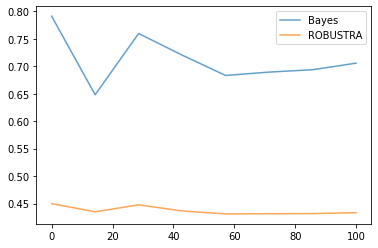

In [166]:
exp1.plot()

In [134]:
exp1.ballot_stuffing(202, 101, 1, targetc=103, n_consumers=1)

Consumer :101 rated Provider :202 with 1
Consumer :101 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :101's current satisfaction and disatisfaction for Provider :202 are : 6.92357481442535 :2.0764251855746516
9.000000000000002
Consumer :101's current belief,disbelief, and uncertainity for Provider :202 are : 0.7692006237557326 :0.23068827747746376 : 0.00011109876680368847
Consumer :202 rated Provider :101 with 1
Consumer :202 evaluates Provider :101 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :101 are : 6.687705152881141 :2.312294847118858
8.999999999999998
Consumer :202's current belief,disbelief, and uncertainity for Provider :101 are : 0.7429957952317678 :0.25689310600142856 : 0.00011109876680368851
Consumer :102 rated Provider :202 with 1
Consumer :102 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :102's current satisfaction and disatisfaction for Provider :202 are : 7.8765

Consumer :102's current satisfaction and disatisfaction for Provider :202 are : 13.87650141370017 :2.1234985862998306
16.0
Consumer :102's current belief,disbelief, and uncertainity for Provider :202 are : 0.8672271366602193 :0.13271036724578653 : 6.249609399412537e-05
Consumer :202 rated Provider :102 with 1
Consumer :202 evaluates Provider :102 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :102 are : 12.940722019944808 :3.059277980055193
16.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :102 are : 0.8087445797103185 :0.1911929241956873 : 6.249609399412537e-05
11.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.7124775473072379 :0.2874315518655647 : 9.09008271975275e-05
8.584324407165338
6.459031223120017
9.878448013905924
9.07991992309711
6.570505916427495
7.054689849076555
4.544299282111539
5.096590991235972
7.904949711535805
2.96809447173801
15.00000000000000

6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
6.914439652553495
13.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.7487100535516222 :0.2512185229786257 : 7.142346975216059e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
10.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
6.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.7482287697935627 :0.2516045913129195 : 0.00016663889351774703
8.527666191102098
7.326410398825331
6.4568584410284515
4.97346305227842
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
10.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.7583769354791631 :0.24152307451983704 : 9.999000099990002e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513780528219279
7.58120

[0.44983716750212993, 0.4350502903401113, 0.44774407851420456, 0.4365587406136109, 0.4311869246930856, 0.43152605603871996, 0.43174959258848483, 0.4334555070693491, 0.4484257793906564, 0.44904822694873114, 0.4495718045760261, 0.4500208095736147, 0.4504120799759687, 0.45075765759851827, 0.4510663859825718, 0.451344909187842, 0.4515983181252454, 0.45183058148774935]


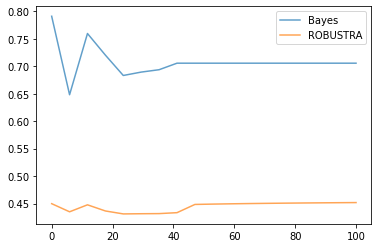

In [126]:
exp1.plot()

[0.44983716750212993, 0.4350502903401113, 0.44774407851420456, 0.4365587406136109, 0.4311869246930856, 0.43152605603871996, 0.43174959258848483, 0.4334555070693491, 0.44904945347930614, 0.45019638750961094, 0.45116963901294715, 0.45201039737175774, 0.45274758124437914, 0.4534021046196628, 0.4539894767197722, 0.454521449174932, 0.4550070946544186, 0.45545353361519963]


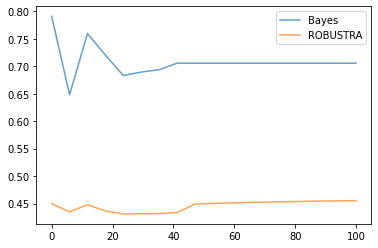

In [131]:
exp1.plot()

[0.44983716750212993, 0.4350502903401113, 0.44774407851420456, 0.4365587406136109, 0.4311869246930856, 0.43152605603871996, 0.43174959258848483, 0.4334555070693491, 0.4493966676069053, 0.4508337586405539, 0.45205480814300525, 0.453110977348787, 0.45403819439674226, 0.4548624481741738, 0.4556030153244019, 0.4562745051230361, 0.45688819876589887, 0.4574529518755742]


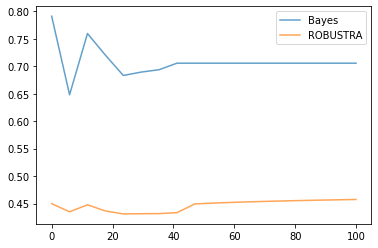

In [135]:
exp1.plot()

In [152]:
exp1.bad_mouthing(202, 101, 0.001, targetc=103, n_consumers=1)

Consumer :101 rated Provider :202 with 0.001
Consumer :101 evaluates Provider :202 satisfaction: 0.5005disatisfaction :0.4995
Consumer :101's current satisfaction and disatisfaction for Provider :202 are : 6.4240748144253494 :2.5759251855746514
9.0
Consumer :101's current belief,disbelief, and uncertainity for Provider :202 are : 0.7137067897372903 :0.28618211149590617 : 0.00011109876680368848
Consumer :202 rated Provider :101 with 0.03967218970112496
Consumer :202 evaluates Provider :101 satisfaction: 0.5198360948505625disatisfaction :0.4801639051494375
Consumer :202's current satisfaction and disatisfaction for Provider :101 are : 6.207541247731704 :2.7924587522682955
9.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :101 are : 0.689650177506022 :0.31023872372717426 : 0.00011109876680368848
Consumer :102 rated Provider :202 with 0.001
Consumer :102 evaluates Provider :202 satisfaction: 0.5005disatisfaction :0.4995
Consumer :102's current satisfaction and dis

7.129530125604526
5.838179580115677
7.628590532476432
6.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
4.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.7069311737363606 :0.2928188887480183 : 0.0002499375156210947
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
3.117095600882259
4.624650335964298
9.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7608191938912033 :0.239069707341993 : 0.00011109876680368848
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
5.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :101 rated Provider :202 with 0.001
Consumer :101 evaluates Provider :202 satisfaction: 0.5005disatisfaction :0.4995
Consumer :101's current satisfaction and disatisfaction for Provider :202 are : 9.427074

Consumer :102 evaluates Provider :202 satisfaction: 0.5005disatisfaction :0.4995
Consumer :102's current satisfaction and disatisfaction for Provider :202 are : 11.381001413700174 :6.618998586299831
18.000000000000007
Consumer :102's current belief,disbelief, and uncertainity for Provider :202 are : 0.6322427317204693 :0.3677017158102232 : 5.555246930726068e-05
Consumer :202 rated Provider :102 with 0.1130770293300627
Consumer :202 evaluates Provider :102 satisfaction: 0.5565385146650313disatisfaction :0.44346148533496865
Consumer :202's current satisfaction and disatisfaction for Provider :102 are : 11.9096435455593 :6.0903564544407
18.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :102 are : 0.6616101075250985 :0.3383343400055941 : 5.55524693072607e-05
11.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.7124775473072379 :0.2874315518655647 : 9.09008271975275e-05
8.584324407165338
6.459031223120017
9.878448013905924
9.07

[0.44983716750212993, 0.4350502903401113, 0.44774407851420456, 0.4365587406136109, 0.4311869246930856, 0.43152605603871996, 0.43174959258848483, 0.4334555070693491, 0.4459582050572055, 0.44465513532117795, 0.44367825070111433, 0.44275658314824645, 0.44203176526416366, 0.44146366737453074, 0.440951969146237, 0.44046039532583015, 0.4399263826706183, 0.43946928264655655]


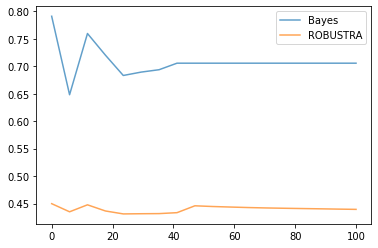

In [153]:
exp1.plot()

In [179]:
exp1.majority_descrimination(202, 101, 0.001, targetc=103, n_consumers=1)

Consumer :100 rated Provider :202 with 1
Consumer :100 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :100's current satisfaction and disatisfaction for Provider :202 are : 8.837965497926923 :3.162034502073077
12.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.7364357551809786 :0.26348091842955396 : 8.332638946754438e-05
Consumer :202 rated Provider :100 with 1
Consumer :202 evaluates Provider :100 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :100 are : 9.584324407165338 :2.4156755928346616
12.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :100 are : 0.7986271483347503 :0.20128952527578217 : 8.332638946754438e-05
12.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.7364357551809786 :0.26348091842955396 : 8.332638946754438e-05
9.584324407165338
6.459031223120017
9.878448013905924
9.07991992309711
6.5705

6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
6.914439652553495
13.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.7487100535516222 :0.2512185229786257 : 7.142346975216059e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
10.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
6.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.7482287697935627 :0.2516045913129195 : 0.00016663889351774703
8.527666191102098
7.326410398825331
6.4568584410284515
4.97346305227842
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
10.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.7583769354791631 :0.24152307451983704 : 9.999000099990002e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513780528219279
7.58120

7.4758287848975735
7.204437975384591
6.2843201408846285
7.262053599091467
5.230659879957071
5.706634640735647
4.851692888659684
5.0
Consumer :106's current belief,disbelief, and uncertainity for Provider :202 are : 0.7677181259554813 :0.2320819140365202 : 0.0001999600079984003
8.896888587508224
7.573078737629874
4.064946263918497
4.457953224321711
6.824481628057631
13.704226756472835
5.925226473009791
4.490425586803663
8.327699944490904
5.330376825465184
6.0
Consumer :107's current belief,disbelief, and uncertainity for Provider :202 are : 0.811259292123956 :0.1885740689825262 : 0.00016663889351774703
4.32766440651689
7.0877676458113665
9.240378927073714
6.077410245982554
7.011884976458888
9.085494340089625
6.114952647877451
8.236763216157284
5.294547241469185
5.1923383336063775
11.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.7516626889737594 :0.24824641019904314 : 9.09008271975275e-05
8.958158199597445
5.723377599693606
6.293146095678442
9.420

Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7201326408211275 :0.27972452244126356 : 0.00014283673760891302
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
5.638244690187027
9.856515408398115
8.344878327742276
2.162682685779683
9.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6836412920447603 :0.3162476091884361 : 0.00011109876680368848
8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
6.914439652553495
13.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.7487100535516222 :0.2512185229786257 : 7.142346975216059e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
10.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.4827998544

6.841740870801986
5.731956900545057
6.847826084144051
5.73262795441117
9.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.742399977773199 :0.2574889234599975 : 0.00011109876680368848
7.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
8.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.7838716862607336 :0.2160033293623136 : 0.0001249843769528809
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
6.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
4.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.7069311737363606 :0.2928188887480183 : 0.0002499375156210947
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814

Consumer :202 rated Provider :102 with 1
Consumer :202 evaluates Provider :102 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :102 are : 8.940722019944808 :3.059277980055193
12.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :102 are : 0.7449980851549711 :0.2549185884555614 : 8.332638946754438e-05
21.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.8493864814974011 :0.15056590172244544 : 4.761678015332603e-05
18.58432440716534
6.459031223120017
9.878448013905924
9.07991992309711
6.570505916427495
7.054689849076555
4.544299282111539
5.096590991235972
7.904949711535805
2.96809447173801
18.000000000000004
Consumer :101's current belief,disbelief, and uncertainity for Provider :202 are : 0.8845939011402337 :0.11535054639045893 : 5.5552469307260696e-05
5.082675004937374
10.986611061910661
6.3687282480030865
4.31959696669823
5.809006225460769
10.405427990892921
5.9379958

9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
5.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :102 rated Provider :202 with 1
Consumer :102 evaluates Provider :202 satisfaction: 1.0disatisfaction :0.0
Consumer :102's current satisfaction and disatisfaction for Provider :202 are : 13.87650141370017 :2.1234985862998306
16.0
Consumer :102's current belief,disbelief, and uncertainity for Provider :202 are : 0.8672271366602193 :0.13271036724578653 : 6.249609399412537e-05
Consumer :202 rated Provider :102 with 1
Consumer :202 evaluates Provider :102 satisfaction: 1.0disatisfaction :0.0
Consumer :202's current satisfaction and disatisfaction for Provider :102 are : 12.940722019944808 :3.059277980055193
16.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :102 are : 0.8087445797103185 :0.1911929241956873 : 6.249609399412537e-05
21.0
Consumer :100's current belief,disbelief, and

5.482799854441976
6.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.7482287697935627 :0.2516045913129195 : 0.00016663889351774703
8.527666191102098
7.326410398825331
6.4568584410284515
4.97346305227842
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
10.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.7583769354791631 :0.24152307451983704 : 9.999000099990002e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513780528219279
7.581207185624616
6.850180056469976
4.572677933932528
9.520930540438254
6.351349282539093
5.9633665542062335
9.0
Consumer :115's current belief,disbelief, and uncertainity for Provider :202 are : 0.815018831420054 :0.18487006981314233 : 0.00011109876680368848
8.713581953198922
5.711275458081788
7.695844960841466
7.354019066426277
5.900531032142283
5.5054426777170455
6.841740870801986
5.731956900545057
6.847826084144051
5.

4.490425586803663
8.327699944490904
5.330376825465184
6.0
Consumer :107's current belief,disbelief, and uncertainity for Provider :202 are : 0.811259292123956 :0.1885740689825262 : 0.00016663889351774703
4.32766440651689
7.0877676458113665
9.240378927073714
6.077410245982554
7.011884976458888
9.085494340089625
6.114952647877451
8.236763216157284
5.294547241469185
5.1923383336063775
11.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.7516626889737594 :0.24824641019904314 : 9.09008271975275e-05
8.958158199597445
5.723377599693606
6.293146095678442
9.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
14.0
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7685913560380749 :0.23133722049217284 : 7.142346975216056e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
10.579510546321572
11.590185528757527
7

8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
10.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
7.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7201326408211275 :0.27972452244126356 : 0.00014283673760891302
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
5.638244690187027
9.856515408398115
8.344878327742276
2.162682685779683
9.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6836412920447603 :0.3162476091884361 : 0.00011109876680368848
8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
6.914439652553495
13.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.7487100535516222 :0.2512185229786257 : 7.142346975216059e-05
8.020

8.713581953198922
5.711275458081788
7.695844960841466
7.354019066426277
5.900531032142283
5.5054426777170455
6.841740870801986
5.731956900545057
6.847826084144051
5.73262795441117
9.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.742399977773199 :0.2574889234599975 : 0.00011109876680368848
7.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
8.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.7838716862607336 :0.2160033293623136 : 0.0001249843769528809
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
6.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
4.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.7069311737363606 :0.2928188887480183 : 0.0002499375156210947
5.16016957

5.345586757382882
3.117095600882259
4.624650335964298
9.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7608191938912033 :0.239069707341993 : 0.00011109876680368848
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
5.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :105 rated Provider :202 with 0.43178196486795406
Consumer :105 evaluates Provider :202 satisfaction: 0.715890982433977disatisfaction :0.28410901756602297
Consumer :105's current satisfaction and disatisfaction for Provider :202 are : 7.829872011348465 :4.170127988651535
12.0
Consumer :105's current belief,disbelief, and uncertainity for Provider :202 are : 0.6524349646986473 :0.34748170891188523 : 8.332638946754438e-05
Consumer :202 rated Provider :105 with 0
Consumer :202 evaluates Provider :105 satisfaction: 0.5disatisfaction :0.5
Consumer :202's current satisfaction and disatisfaction for Provider

7.8880799499843235
7.11868100224575
6.723794806156701
4.773509539680877
7.999999999999999
Consumer :103's current belief,disbelief, and uncertainity for Provider :202 are : 0.7053652907389444 :0.29450972488410265 : 0.0001249843769528809
6.844020971140978
5.934763524757521
12.448300214750406
10.12063825193451
7.761334074385467
3.749797727301236
5.040958486924149
6.159354974315456
0.9309498430190932
7.0627435224647135
19.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.8652431797156633 :0.13470419147532656 : 5.26288090100521e-05
8.09526902984942
6.803218129325828
9.60098082768678
7.400663646913287
6.084084916442621
10.072979288908002
16.32654180762885
3.7292748567360334
3.644199515328397
4.844791427608656
16.000000000000004
Consumer :105's current belief,disbelief, and uncertainity for Provider :202 are : 0.6434363709804547 :0.356501132925551 : 6.249609399412536e-05
9.033876797760787
7.462504497449038
8.765647374838593
7.4758287848975735
7.2044379753

6.844020971140978
5.934763524757521
12.448300214750406
10.12063825193451
7.761334074385467
3.749797727301236
5.040958486924149
6.159354974315456
0.9309498430190932
7.0627435224647135
19.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.8652431797156633 :0.13470419147532656 : 5.26288090100521e-05
8.09526902984942
6.803218129325828
9.60098082768678
7.400663646913287
6.084084916442621
10.072979288908002
16.32654180762885
3.7292748567360334
3.644199515328397
4.844791427608656
17.0
Consumer :105's current belief,disbelief, and uncertainity for Provider :202 are : 0.6411367195672942 :0.35880446036329805 : 5.8820069407681895e-05
9.033876797760787
7.462504497449038
8.765647374838593
7.4758287848975735
7.204437975384591
6.2843201408846285
7.262053599091467
10.23065987995707
5.706634640735647
4.851692888659684
9.0
Consumer :106's current belief,disbelief, and uncertainity for Provider :202 are : 0.7277730734155322 :0.27211582781766414 : 0.00011109876680368848

11.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.7516626889737594 :0.24824641019904314 : 9.09008271975275e-05
8.958158199597445
5.723377599693606
6.293146095678442
9.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
14.0
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7685913560380749 :0.23133722049217284 : 7.142346975216056e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
10.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
7.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7201326408211275 :0.27972452244126356 : 0.00014283673760891302
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
5.638244690187027
9.856515408398115
8.344878327742276
2.16268268577968

9.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
14.0
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7685913560380749 :0.23133722049217284 : 7.142346975216056e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
10.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
7.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7201326408211275 :0.27972452244126356 : 0.00014283673760891302
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
5.638244690187027
9.856515408398115
8.344878327742276
2.162682685779683
9.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6836412920447603 :0.3162476091884361 : 0.00011109876680368848
8.041399664764896
7.2001375253629085
7.9596701182411

9.165203374928574
4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
8.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.7838716862607336 :0.2160033293623136 : 0.0001249843769528809
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
6.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
4.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.7069311737363606 :0.2928188887480183 : 0.0002499375156210947
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
3.117095600882259
4.624650335964298
9.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7608191938912033 :0.239069707341993 : 0.00011109876680368848
9.602242230493856
6.761545400066637
9.14873117

9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
3.117095600882259
4.624650335964298
9.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7608191938912033 :0.239069707341993 : 0.00011109876680368848
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
5.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :107 rated Provider :202 with 0.47802102315119127
Consumer :107 evaluates Provider :202 satisfaction: 0.7390105115755956disatisfaction :0.2609894884244044
Consumer :107's current satisfaction and disatisfaction for Provider :202 are : 10.470941121252174 :4.529058878747825
15.0
Consumer :107's current belief,disbelief, and uncertainity for Provider :202 are : 0.6980162070030115 :0.30191713077447 : 6.666222251849876e-05
Consumer :202 rated Provider :107 with 0
Consumer :202 evaluates Provider :107 satisfaction: 0.5disatisfaction :0.5
Consumer :202's

9.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6836412920447603 :0.3162476091884361 : 0.00011109876680368848
8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
6.914439652553495
13.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.7487100535516222 :0.2512185229786257 : 7.142346975216059e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
10.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
6.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.7482287697935627 :0.2516045913129195 : 0.00016663889351774703
8.527666191102098
7.326410398825331
6.4568584410284515
4.97346305227842
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882

8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :108 rated Provider :202 with 0.07321445001228388
Consumer :108 evaluates Provider :202 satisfaction: 0.536607225006142disatisfaction :0.46339277499385806
Consumer :108's current satisfaction and disatisfaction for Provider :202 are : 9.888753740261134 :4.111246259738867
14.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.7062891036541057 :0.2936394728761422 : 7.142346975216056e-05
Consumer :202 rated Provider :108 with 0
Consumer :202 evaluates Provider :108 satisfaction: 0.5disatisfaction :0.5
Consumer :202's current satisfaction and disatisfaction for Provider :108 are : 10.920537664423698 :3.0794623355763013
14.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :108 are : 0.7799826915522962 :0.21994588497795167 : 7.142346975216056e-05
21.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.8493864814974011 :0.15056590172244544

Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.6920050889362765 :0.3079360909943156 : 5.882006940768189e-05
8.958158199597445
5.723377599693606
6.293146095678442
12.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
14.0
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7685913560380749 :0.23133722049217284 : 7.142346975216056e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
10.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
7.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7201326408211275 :0.27972452244126356 : 0.00014283673760891302
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
5.638244690187027
9.856515408398115
8.344878327742276
2.162682685779683
9.

9.32766440651689
7.0877676458113665
9.240378927073714
6.077410245982554
7.011884976458888
9.085494340089625
6.114952647877451
8.236763216157284
5.294547241469185
5.1923383336063775
19.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.6757657251335455 :0.3241816460574445 : 5.26288090100521e-05
8.958158199597445
5.723377599693606
6.293146095678442
13.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
14.0
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7685913560380749 :0.23133722049217284 : 7.142346975216056e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
10.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
7.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7201326408211275 :0.27972452244126356 : 0.0001428367376089130

9.07991992309711
6.570505916427495
7.054689849076555
4.544299282111539
5.096590991235972
7.904949711535805
2.96809447173801
18.000000000000004
Consumer :101's current belief,disbelief, and uncertainity for Provider :202 are : 0.8845939011402337 :0.11535054639045893 : 5.5552469307260696e-05
5.082675004937374
10.986611061910661
6.3687282480030865
4.31959696669823
5.809006225460769
10.405427990892921
5.937995807074404
9.757215540065184
1.9156757452758337
15.68770515288114
19.0
Consumer :102's current belief,disbelief, and uncertainity for Provider :202 are : 0.8881901696595004 :0.11175720153148942 : 5.26288090100521e-05
15.940722019944808
3.9512230729384563
4.703713284954516
10.126651349489908
10.860873183646394
4.70294715318474
7.8880799499843235
7.11868100224575
6.723794806156701
4.773509539680877
7.999999999999999
Consumer :103's current belief,disbelief, and uncertainity for Provider :202 are : 0.7053652907389444 :0.29450972488410265 : 0.0001249843769528809
6.844020971140978
5.9347635

Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7201326408211275 :0.27972452244126356 : 0.00014283673760891302
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
5.638244690187027
9.856515408398115
8.344878327742276
2.162682685779683
9.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6836412920447603 :0.3162476091884361 : 0.00011109876680368848
8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
6.914439652553495
13.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.7487100535516222 :0.2512185229786257 : 7.142346975216059e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
10.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.4827998544

7.999999999999999
Consumer :103's current belief,disbelief, and uncertainity for Provider :202 are : 0.7053652907389444 :0.29450972488410265 : 0.0001249843769528809
6.844020971140978
5.934763524757521
12.448300214750406
10.12063825193451
7.761334074385467
3.749797727301236
5.040958486924149
6.159354974315456
0.9309498430190932
7.0627435224647135
19.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.8652431797156633 :0.13470419147532656 : 5.26288090100521e-05
8.09526902984942
6.803218129325828
9.60098082768678
7.400663646913287
6.084084916442621
10.072979288908002
16.32654180762885
3.7292748567360334
3.644199515328397
4.844791427608656
17.0
Consumer :105's current belief,disbelief, and uncertainity for Provider :202 are : 0.6411367195672942 :0.35880446036329805 : 5.8820069407681895e-05
9.033876797760787
7.462504497449038
8.765647374838593
7.4758287848975735
7.204437975384591
6.2843201408846285
7.262053599091467
10.23065987995707
5.706634640735647
4.85

9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
6.914439652553495
13.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.7487100535516222 :0.2512185229786257 : 7.142346975216059e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
10.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
6.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.7482287697935627 :0.2516045913129195 : 0.00016663889351774703
8.527666191102098
7.326410398825331
6.4568584410284515
4.97346305227842
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
10.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.7583769354791631 :0.24152307451983704 : 9.999000099990002e-05
7.749264918283848
4.008719452956818
8.795098

7.011884976458888
9.085494340089625
6.114952647877451
8.236763216157284
5.294547241469185
5.1923383336063775
21.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.6645672210484965 :0.3353851621713502 : 4.761678015332603e-05
8.958158199597445
5.723377599693606
6.293146095678442
14.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
24.000000000000004
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7071957040157635 :0.2927626310536085 : 4.16649306278905e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
15.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
15.000000000000002
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.672378192005082 :0.3275551457723996 : 6.666222251849876e-05
6.815141768541862
9.263147360332086
7.0299284

3.93457595423052
4.533977985374578
4.106360557478903
8.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.7838716862607336 :0.2160033293623136 : 0.0001249843769528809
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
6.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
4.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.7069311737363606 :0.2928188887480183 : 0.0002499375156210947
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
3.117095600882259
4.624650335964298
9.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7608191938912033 :0.239069707341993 : 0.00011109876680368848
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
5.981525710789317
5.210025324782908
8.28395733178247
8.7999697877

7.011884976458888
9.085494340089625
6.114952647877451
8.236763216157284
5.294547241469185
5.1923383336063775
21.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.6645672210484965 :0.3353851621713502 : 4.761678015332603e-05
8.958158199597445
5.723377599693606
6.293146095678442
14.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
24.000000000000004
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7071957040157635 :0.2927626310536085 : 4.16649306278905e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
15.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
17.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.6793748510235151 :0.32056632890707726 : 5.8820069407681895e-05
6.815141768541862
9.263147360332086
7.029928431722753
3.

5.937995807074404
9.757215540065184
1.9156757452758337
15.68770515288114
19.0
Consumer :102's current belief,disbelief, and uncertainity for Provider :202 are : 0.8881901696595004 :0.11175720153148942 : 5.26288090100521e-05
15.940722019944808
3.9512230729384563
4.703713284954516
10.126651349489908
10.860873183646394
4.70294715318474
7.8880799499843235
7.11868100224575
6.723794806156701
4.773509539680877
7.999999999999999
Consumer :103's current belief,disbelief, and uncertainity for Provider :202 are : 0.7053652907389444 :0.29450972488410265 : 0.0001249843769528809
6.844020971140978
5.934763524757521
12.448300214750406
10.12063825193451
7.761334074385467
3.749797727301236
5.040958486924149
6.159354974315456
0.9309498430190932
7.0627435224647135
19.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.8652431797156633 :0.13470419147532656 : 5.26288090100521e-05
8.09526902984942
6.803218129325828
9.60098082768678
7.400663646913287
6.084084916442621
10.072

5.082675004937374
10.986611061910661
6.3687282480030865
4.31959696669823
5.809006225460769
10.405427990892921
5.937995807074404
9.757215540065184
1.9156757452758337
15.68770515288114
19.0
Consumer :102's current belief,disbelief, and uncertainity for Provider :202 are : 0.8881901696595004 :0.11175720153148942 : 5.26288090100521e-05
15.940722019944808
3.9512230729384563
4.703713284954516
10.126651349489908
10.860873183646394
4.70294715318474
7.8880799499843235
7.11868100224575
6.723794806156701
4.773509539680877
7.999999999999999
Consumer :103's current belief,disbelief, and uncertainity for Provider :202 are : 0.7053652907389444 :0.29450972488410265 : 0.0001249843769528809
6.844020971140978
5.934763524757521
12.448300214750406
10.12063825193451
7.761334074385467
3.749797727301236
5.040958486924149
6.159354974315456
0.9309498430190932
7.0627435224647135
19.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.8652431797156633 :0.13470419147532656 : 5.262

10.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.7583769354791631 :0.24152307451983704 : 9.999000099990002e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513780528219279
7.581207185624616
6.850180056469976
4.572677933932528
9.520930540438254
6.351349282539093
5.9633665542062335
9.0
Consumer :115's current belief,disbelief, and uncertainity for Provider :202 are : 0.815018831420054 :0.18487006981314233 : 0.00011109876680368848
8.713581953198922
5.711275458081788
7.695844960841466
7.354019066426277
5.900531032142283
5.5054426777170455
6.841740870801986
5.731956900545057
6.847826084144051
5.73262795441117
9.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.742399977773199 :0.2574889234599975 : 0.00011109876680368848
7.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
8.0
Co

5.723377599693606
6.293146095678442
14.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
24.000000000000004
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7071957040157635 :0.2927626310536085 : 4.16649306278905e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
15.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
17.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.6793748510235151 :0.32056632890707726 : 5.8820069407681895e-05
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
10.638244690187026
9.856515408398115
8.344878327742276
2.162682685779683
19.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6642462832968529 :0.33570108789413705 : 5.26288090100521e-05
8

8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
10.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.7583769354791631 :0.24152307451983704 : 9.999000099990002e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513780528219279
7.581207185624616
6.850180056469976
4.572677933932528
9.520930540438254
6.351349282539093
5.9633665542062335
9.0
Consumer :115's current belief,disbelief, and uncertainity for Provider :202 are : 0.815018831420054 :0.18487006981314233 : 0.00011109876680368848
8.713581953198922
5.711275458081788
7.695844960841466
7.354019066426277
5.900531032142283
5.5054426777170455
6.841740870801986
5.731956900545057
6.847826084144051
5.73262795441117
9.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.742399977773199 :0.2574889234599975 : 0.00011109876680368848
7.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.82

6.084084916442621
10.072979288908002
16.32654180762885
3.7292748567360334
3.644199515328397
4.844791427608656
17.0
Consumer :105's current belief,disbelief, and uncertainity for Provider :202 are : 0.6411367195672942 :0.35880446036329805 : 5.8820069407681895e-05
9.033876797760787
7.462504497449038
8.765647374838593
7.4758287848975735
7.204437975384591
6.2843201408846285
7.262053599091467
10.23065987995707
5.706634640735647
4.851692888659684
14.999999999999996
Consumer :106's current belief,disbelief, and uncertainity for Provider :202 are : 0.6629962627421642 :0.3369370750353175 : 6.666222251849879e-05
8.896888587508224
7.573078737629874
4.064946263918497
9.457953224321711
6.824481628057631
13.704226756472835
5.925226473009791
4.490425586803663
8.327699944490904
5.330376825465184
16.0
Consumer :107's current belief,disbelief, and uncertainity for Provider :202 are : 0.6903880387080752 :0.30954946519793053 : 6.249609399412537e-05
9.32766440651689
7.0877676458113665
9.240378927073714
6.0

7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
11.914439652553494
23.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.6996651081558793 :0.3002932269134927 : 4.166493062789051e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
15.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
16.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.6697265736755362 :0.33021093023046966 : 6.249609399412537e-05
8.527666191102098
7.326410398825331
6.4568584410284515
9.973463052278419
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
12.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.745042360374194 :0.25487431323633836 : 8.332638946754438e-05
7.749264918283848
4.0087

6.847826084144051
5.73262795441117
9.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.742399977773199 :0.2574889234599975 : 0.00011109876680368848
7.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
8.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.7838716862607336 :0.2160033293623136 : 0.0001249843769528809
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
6.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
4.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.7069311737363606 :0.2928188887480183 : 0.0002499375156210947
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
3.117095600

4.160388653921347
15.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
17.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.6793748510235151 :0.32056632890707726 : 5.8820069407681895e-05
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
10.638244690187026
9.856515408398115
8.344878327742276
2.162682685779683
19.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6642462832968529 :0.33570108789413705 : 5.26288090100521e-05
8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
11.914439652553494
23.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.6996651081558793 :0.3002932269134927 : 4.166493062789051e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.998

4.160388653921347
15.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
17.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.6793748510235151 :0.32056632890707726 : 5.8820069407681895e-05
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
10.638244690187026
9.856515408398115
8.344878327742276
2.162682685779683
19.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6642462832968529 :0.33570108789413705 : 5.26288090100521e-05
8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
11.914439652553494
23.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.6996651081558793 :0.3002932269134927 : 4.166493062789051e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.998

7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
11.914439652553494
23.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.6996651081558793 :0.3002932269134927 : 4.166493062789051e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
15.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
16.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.6697265736755362 :0.33021093023046966 : 6.249609399412537e-05
8.527666191102098
7.326410398825331
6.4568584410284515
9.973463052278419
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
20.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.6999495003518414 :0.3000005021480334 : 4.999750012499375e-05
7.749264918283848
4.0087

4.624650335964298
9.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7608191938912033 :0.239069707341993 : 0.00011109876680368848
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
5.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :115 rated Provider :202 with 0.42088208892776346
Consumer :115 evaluates Provider :202 satisfaction: 0.7104410444638818disatisfaction :0.28955895553611827
Consumer :115's current satisfaction and disatisfaction for Provider :202 are : 13.181607887058846 :4.818392112941152
17.999999999999996
Consumer :115's current belief,disbelief, and uncertainity for Provider :202 are : 0.7322708675661823 :0.2676735799645104 : 5.5552469307260716e-05
Consumer :202 rated Provider :115 with 0
Consumer :202 evaluates Provider :115 satisfaction: 0.5disatisfaction :0.5
Consumer :202's current satisfaction and disatisfaction for Provider :115 are : 11.34174

6.761545400066637
9.14873117083494
3.7973480764125203
5.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :116 rated Provider :202 with 0.48661861559722414
Consumer :116 evaluates Provider :202 satisfaction: 0.743309307798612disatisfaction :0.25669069220138796
Consumer :116's current satisfaction and disatisfaction for Provider :202 are : 7.425651507735176 :2.5743484922648254
10.000000000000002
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.7424909016833492 :0.25740910831565095 : 9.99900009999e-05
Consumer :202 rated Provider :116 with 0
Consumer :202 evaluates Provider :116 satisfaction: 0.5disatisfaction :0.5
Consumer :202's current satisfaction and disatisfaction for Provider :116 are : 7.673287437223959 :2.3267125627760397
9.999999999999998
Consumer :202's current belief,disbelief, and uncertainity for Provider :116 are : 0.767252018520544 :0.23264799147845616 : 9.999000099990003e-

4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
6.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
4.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.7069311737363606 :0.2928188887480183 : 0.0002499375156210947
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
3.117095600882259
4.624650335964298
9.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7608191938912033 :0.239069707341993 : 0.00011109876680368848
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
5.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :116 rated Provider :202 with 0.08986103292691389
Consumer :116 evaluates Provider :202 satisfaction: 0.5449305164634569disatisfaction :0.4550694835365431
Consumer :116

9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
10.638244690187026
9.856515408398115
8.344878327742276
2.162682685779683
19.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6642462832968529 :0.33570108789413705 : 5.26288090100521e-05
8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
11.914439652553494
23.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.6996651081558793 :0.3002932269134927 : 4.166493062789051e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
15.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
16.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.6697265736755362 :0.33021093023046966 : 6.249609399412537e-05
8.5276

4.544299282111539
5.096590991235972
7.904949711535805
2.96809447173801
18.000000000000004
Consumer :101's current belief,disbelief, and uncertainity for Provider :202 are : 0.8845939011402337 :0.11535054639045893 : 5.5552469307260696e-05
5.082675004937374
10.986611061910661
6.3687282480030865
4.31959696669823
5.809006225460769
10.405427990892921
5.937995807074404
9.757215540065184
1.9156757452758337
15.68770515288114
19.0
Consumer :102's current belief,disbelief, and uncertainity for Provider :202 are : 0.8881901696595004 :0.11175720153148942 : 5.26288090100521e-05
15.940722019944808
3.9512230729384563
4.703713284954516
10.126651349489908
10.860873183646394
4.70294715318474
7.8880799499843235
7.11868100224575
6.723794806156701
4.773509539680877
7.999999999999999
Consumer :103's current belief,disbelief, and uncertainity for Provider :202 are : 0.7053652907389444 :0.29450972488410265 : 0.0001249843769528809
6.844020971140978
5.934763524757521
12.448300214750406
10.12063825193451
7.76133

5.838179580115677
7.628590532476432
8.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
4.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.7069311737363606 :0.2928188887480183 : 0.0002499375156210947
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
3.117095600882259
4.624650335964298
9.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7608191938912033 :0.239069707341993 : 0.00011109876680368848
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
5.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :117 rated Provider :202 with 0.2934453657506201
Consumer :117 evaluates Provider :202 satisfaction: 0.6467226828753101disatisfaction :0.35327731712468996
Consumer :117's current satisfaction and disatisfaction for Provider

8.327699944490904
5.330376825465184
16.0
Consumer :107's current belief,disbelief, and uncertainity for Provider :202 are : 0.6903880387080752 :0.30954946519793053 : 6.249609399412537e-05
9.32766440651689
7.0877676458113665
9.240378927073714
6.077410245982554
7.011884976458888
9.085494340089625
6.114952647877451
8.236763216157284
5.294547241469185
5.1923383336063775
21.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.6645672210484965 :0.3353851621713502 : 4.761678015332603e-05
8.958158199597445
5.723377599693606
6.293146095678442
14.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
24.000000000000004
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7071957040157635 :0.2927626310536085 : 4.16649306278905e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
15.579510546321572
11.590185528757527
7.16

5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
10.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6694331880175457 :0.33046682198145444 : 9.999000099990002e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
6.117095600882259
4.624650335964298
9.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7608191938912033 :0.239069707341993 : 0.00011109876680368848
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
5.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :118 rated Provider :202 with 0.01459696122619114
Consumer :118 evaluates Provider :202 satisfaction: 0.5072984806130956disatisfaction :0.49270151938690443
Consumer :118's current satisfaction and disatisfaction for Prov

8.958158199597445
5.723377599693606
6.293146095678442
14.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
24.000000000000004
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7071957040157635 :0.2927626310536085 : 4.16649306278905e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
15.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
17.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.6793748510235151 :0.32056632890707726 : 5.8820069407681895e-05
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
10.638244690187026
9.856515408398115
8.344878327742276
2.162682685779683
19.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6642462832968529 :0.33570108789413705 : 5.26

8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :119 rated Provider :202 with 0.0782073871411687
Consumer :119 evaluates Provider :202 satisfaction: 0.5391036935705844disatisfaction :0.46089630642941565
Consumer :119's current satisfaction and disatisfaction for Provider :202 are : 12.057330946527763 :4.942669053472238
17.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7092130431461539 :0.29072813678443843 : 5.8820069407681895e-05
Consumer :202 rated Provider :119 with 0
Consumer :202 evaluates Provider :119 satisfaction: 0.5disatisfaction :0.5
Consumer :202's current satisfaction and disatisfaction for Provider :119 are : 9.981525710789317 :7.018474289210683
17.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :119 are : 0.5871140351031889 :0.41282714482740324 : 5.8820069407681895e-05
21.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.8493864814974011 :0.150565901722445

[0.44983716750212993, 0.4350502903401113, 0.44774407851420456, 0.4365587406136109, 0.4311869246930856, 0.43152605603871996, 0.43174959258848483, 0.4334555070693491, 0.44847223740670816, 0.4491673842869921, 0.44977641179823563, 0.45031615006152537, 0.45079923742823913, 0.45123535252128316, 0.4516320356631109, 0.45199525095811455, 0.4523297797931963, 0.45263950194548713, 0.4535782762111011, 0.4543504948448536, 0.45500095684786707, 0.4555595536939732, 0.4560470013759258, 0.45647811610415107, 0.45686377987250487, 0.45721216903443584, 0.4575295493345829, 0.45782080598412456, 0.4586106539832005, 0.45927552638309654, 0.45984611388253455, 0.46034368624220995, 0.46078345560821266, 0.4611765946574189, 0.4615314980392933, 0.46185459867599643, 0.4621509120187122, 0.46242440847884597, 0.46335139904703404, 0.46412873070864463, 0.4647932570991308, 0.46537051506327864, 0.4658787650063366, 0.46633141527491223, 0.46673853750620353, 0.4671078472270473, 0.4674453576464682, 0.46775582703501833, 0.466891604

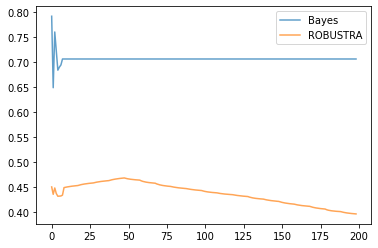

In [172]:
exp1.plot()

[0.44983716750212993, 0.4350502903401113, 0.44774407851420456, 0.4365587406136109, 0.4311869246930856, 0.43152605603871996, 0.43174959258848483, 0.4334555070693491, 0.44847223740670816, 0.4491673842869921, 0.44977641179823563, 0.45031615006152537, 0.45079923742823913, 0.45123535252128316, 0.4516320356631109, 0.45199525095811455, 0.4523297797931963, 0.45263950194548713, 0.4535782762111011, 0.4543504948448536, 0.45500095684786707, 0.4555595536939732, 0.4560470013759258, 0.45647811610415107, 0.45686377987250487, 0.45721216903443584, 0.4575295493345829, 0.45782080598412456, 0.4586106539832005, 0.45927552638309654, 0.45984611388253455, 0.46034368624220995, 0.46078345560821266, 0.4611765946574189, 0.4615314980392933, 0.46185459867599643, 0.4621509120187122, 0.46242440847884597, 0.46335139904703404, 0.46412873070864463, 0.4647932570991308, 0.46537051506327864, 0.4658787650063366, 0.46633141527491223, 0.46673853750620353, 0.4671078472270473, 0.4674453576464682, 0.46775582703501833, 0.466929625

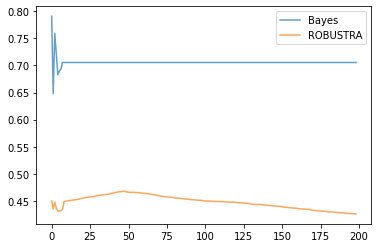

In [180]:
exp1.plot()

In [181]:
exp1.minority_descrimination(202, 101, 0.001, targetc=103, n_consumers=1)

Consumer :100 rated Provider :202 with 0
Consumer :100 evaluates Provider :202 satisfaction: 0.5disatisfaction :0.5
Consumer :100's current satisfaction and disatisfaction for Provider :202 are : 18.337965497926923 :3.662034502073077
22.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.8335059996330586 :0.1664485478875086 : 4.545247943275306e-05
Consumer :202 rated Provider :100 with 0
Consumer :202 evaluates Provider :100 satisfaction: 0.5disatisfaction :0.5
Consumer :202's current satisfaction and disatisfaction for Provider :100 are : 19.08432440716534 :2.9156755928346616
22.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :100 are : 0.8674298626046697 :0.13252468491589753 : 4.545247943275306e-05
22.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.8335059996330586 :0.1664485478875086 : 4.545247943275306e-05
19.08432440716534
6.459031223120017
9.878448013905924
9.07991992309711
6.57050

6.844020971140978
5.934763524757521
12.448300214750406
10.12063825193451
7.761334074385467
3.749797727301236
5.040958486924149
6.159354974315456
0.9309498430190932
7.0627435224647135
19.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.8652431797156633 :0.13470419147532656 : 5.26288090100521e-05
8.09526902984942
6.803218129325828
9.60098082768678
7.400663646913287
6.084084916442621
10.072979288908002
16.32654180762885
3.7292748567360334
3.644199515328397
4.844791427608656
17.0
Consumer :105's current belief,disbelief, and uncertainity for Provider :202 are : 0.6411367195672942 :0.35880446036329805 : 5.8820069407681895e-05
9.033876797760787
7.462504497449038
8.765647374838593
7.4758287848975735
7.204437975384591
6.2843201408846285
7.262053599091467
10.23065987995707
5.706634640735647
4.851692888659684
14.999999999999996
Consumer :106's current belief,disbelief, and uncertainity for Provider :202 are : 0.6629962627421642 :0.3369370750353175 : 6.666222

11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
8.117095600882259
4.624650335964298
19.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7078952147337652 :0.2920521564572248 : 5.26288090100521e-05
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
10.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :101 rated Provider :202 with 0
Consumer :101 evaluates Provider :202 satisfaction: 0.5disatisfaction :0.5
Consumer :101's current satisfaction and disatisfaction for Provider :202 are : 16.42357481442535 :2.5764251855746516
19.000000000000004
Consumer :10

6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
11.914439652553494
23.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.6996651081558793 :0.3002932269134927 : 4.166493062789051e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
15.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
16.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.6697265736755362 :0.33021093023046966 : 6.249609399412537e-05
8.527666191102098
7.326410398825331
6.4568584410284515
9.973463052278419
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
20.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.6999495003518414 :0.3000005021480334 : 4.999750012499375e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513

7.462504497449038
8.765647374838593
7.4758287848975735
7.204437975384591
6.2843201408846285
7.262053599091467
10.23065987995707
5.706634640735647
4.851692888659684
14.999999999999996
Consumer :106's current belief,disbelief, and uncertainity for Provider :202 are : 0.6629962627421642 :0.3369370750353175 : 6.666222251849879e-05
8.896888587508224
7.573078737629874
4.064946263918497
9.457953224321711
6.824481628057631
13.704226756472835
5.925226473009791
4.490425586803663
8.327699944490904
5.330376825465184
16.0
Consumer :107's current belief,disbelief, and uncertainity for Provider :202 are : 0.6903880387080752 :0.30954946519793053 : 6.249609399412537e-05
9.32766440651689
7.0877676458113665
9.240378927073714
6.077410245982554
7.011884976458888
9.085494340089625
6.114952647877451
8.236763216157284
5.294547241469185
5.1923383336063775
21.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.6645672210484965 :0.3353851621713502 : 4.761678015332603e-05
8.9581

4.533977985374578
4.106360557478903
18.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.6960393776160515 :0.3039050699146411 : 5.55524693072607e-05
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
8.117095600882259
4.624650335964298
19.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7078952147337652 :0.2920521564572248 : 5.26288090100521e-05
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
10.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.318225

5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
20.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.6999495003518414 :0.3000005021480334 : 4.999750012499375e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513780528219279
12.581207185624617
6.850180056469976
4.572677933932528
9.520930540438254
6.351349282539093
5.9633665542062335
18.999999999999996
Consumer :115's current belief,disbelief, and uncertainity for Provider :202 are : 0.7208455960595107 :0.2791017751314792 : 5.262880901005211e-05
8.713581953198922
5.711275458081788
7.695844960841466
7.354019066426277
5.900531032142283
5.5054426777170455
11.841740870801985
5.731956900545057
6.847826084144051
5.73262795441117
19.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.6802050957863287 :0.3197422754046612 : 5.26288090100521e-05
12.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.1142

7.011884976458888
9.085494340089625
6.114952647877451
8.236763216157284
5.294547241469185
5.1923383336063775
21.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.6645672210484965 :0.3353851621713502 : 4.761678015332603e-05
8.958158199597445
5.723377599693606
6.293146095678442
14.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
24.000000000000004
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7071957040157635 :0.2927626310536085 : 4.16649306278905e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
15.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
17.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.6793748510235151 :0.32056632890707726 : 5.8820069407681895e-05
6.815141768541862
9.263147360332086
7.029928431722753
3.

9.60098082768678
7.400663646913287
6.084084916442621
10.072979288908002
16.82654180762885
3.7292748567360334
3.644199515328397
4.844791427608656
17.0
Consumer :105's current belief,disbelief, and uncertainity for Provider :202 are : 0.6411367195672942 :0.35880446036329805 : 5.8820069407681895e-05
9.033876797760787
7.462504497449038
8.765647374838593
7.4758287848975735
7.204437975384591
6.2843201408846285
7.262053599091467
10.23065987995707
5.706634640735647
4.851692888659684
14.999999999999996
Consumer :106's current belief,disbelief, and uncertainity for Provider :202 are : 0.6629962627421642 :0.3369370750353175 : 6.666222251849879e-05
8.896888587508224
7.573078737629874
4.064946263918497
9.457953224321711
6.824481628057631
13.704226756472835
5.925226473009791
4.490425586803663
8.327699944490904
5.330376825465184
16.0
Consumer :107's current belief,disbelief, and uncertainity for Provider :202 are : 0.6903880387080752 :0.30954946519793053 : 6.249609399412537e-05
9.32766440651689
7.087

10.986611061910661
6.3687282480030865
4.31959696669823
5.809006225460769
10.405427990892921
5.937995807074404
9.757215540065184
1.9156757452758337
20.68770515288114
29.0
Consumer :102's current belief,disbelief, and uncertainity for Provider :202 are : 0.7543361061239325 :0.24562941230646634 : 3.448156960104824e-05
20.940722019944808
3.9512230729384563
4.703713284954516
10.126651349489908
10.860873183646394
4.70294715318474
7.8880799499843235
7.11868100224575
6.723794806156701
4.773509539680877
7.999999999999999
Consumer :103's current belief,disbelief, and uncertainity for Provider :202 are : 0.7053652907389444 :0.29450972488410265 : 0.0001249843769528809
6.844020971140978
5.934763524757521
12.448300214750406
10.12063825193451
7.761334074385467
3.749797727301236
5.040958486924149
6.159354974315456
0.9309498430190932
7.0627435224647135
22.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.8154395553737248 :0.18451499214684242 : 4.545247943275306e-05


4.624650335964298
19.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7078952147337652 :0.2920521564572248 : 5.26288090100521e-05
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
10.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :104 rated Provider :202 with 0
Consumer :104 evaluates Provider :202 satisfaction: 0.5disatisfaction :0.5
Consumer :104's current satisfaction and disatisfaction for Provider :202 are : 18.94048565777732 :5.0595143422226805
24.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.789154020989847 :0.21080431407952502 : 4.1664930627890504e-05
Consumer :202 rated Provider :104 with 0
Consumer :202 evaluates Provider :104 satisfaction: 0.5disatisfaction :0.5
Consumer :202's current satisfaction and disatisfaction for Provider :104 are : 18.82654180762885 :5.173458192371152
24.0
Consumer :202's current beli

6.847826084144051
5.73262795441117
19.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.6802050957863287 :0.3197422754046612 : 5.26288090100521e-05
12.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
18.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.6960393776160515 :0.3039050699146411 : 5.55524693072607e-05
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
8.117095

8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
15.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
16.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.6697265736755362 :0.33021093023046966 : 6.249609399412537e-05
8.527666191102098
7.326410398825331
6.4568584410284515
9.973463052278419
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
20.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.6999495003518414 :0.3000005021480334 : 4.999750012499375e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513780528219279
12.581207185624617
6.850180056469976
4.572677933932528
9.520930540438254
6.351349282539093
5.9633665542062335
18.999999999999996
Consumer :115's current belief,disbelief, and uncertainity for Provider :202 are : 0.7208455960595107 :0.2791017751314792 : 5.26288

10.12063825193451
7.761334074385467
3.749797727301236
5.040958486924149
6.159354974315456
0.9309498430190932
7.0627435224647135
29.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.7393015984889252 :0.26066391994147375 : 3.448156960104824e-05
8.09526902984942
6.803218129325828
9.60098082768678
7.400663646913287
6.084084916442621
10.072979288908002
21.32654180762885
3.7292748567360334
3.644199515328397
4.844791427608656
21.0
Consumer :105's current belief,disbelief, and uncertainity for Provider :202 are : 0.6844409393297487 :0.315511443890098 : 4.761678015332603e-05
9.033876797760787
7.462504497449038
8.765647374838593
7.4758287848975735
7.204437975384591
6.2843201408846285
7.262053599091467
13.49642020717647
5.706634640735647
4.851692888659684
14.999999999999996
Consumer :106's current belief,disbelief, and uncertainity for Provider :202 are : 0.6629962627421642 :0.3369370750353175 : 6.666222251849879e-05
8.896888587508224
7.573078737629874
4.06494

14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
8.117095600882259
4.624650335964298
19.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7078952147337652 :0.2920521564572248 : 5.26288090100521e-05
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
10.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :105 rated Provider :202 with 0.743972026970273
Consumer :105 evaluates Provider :202 satisfaction: 0.8719860134851365disatisfaction :0.1280139865148635
Consumer :105's current satisfaction and disatisfaction for Provider :202 are : 17.832931627746007 :7.167068372253998
25.000000000000004
Consumer :105's current belief,disbelief

4.763213565181976
15.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
16.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.6697265736755362 :0.33021093023046966 : 6.249609399412537e-05
8.527666191102098
7.326410398825331
6.4568584410284515
9.973463052278419
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
20.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.6999495003518414 :0.3000005021480334 : 4.999750012499375e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513780528219279
12.581207185624617
6.850180056469976
4.572677933932528
9.520930540438254
6.351349282539093
5.9633665542062335
18.999999999999996
Consumer :115's current belief,disbelief, and uncertainity for Provider :202 are : 0.7208455960595107 :0.2791017751314792 : 5.262880901005211e-05
8.713581953198922
5.711275458081788
7.695844960841466
7.3

19.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7078952147337652 :0.2920521564572248 : 5.26288090100521e-05
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
10.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :106 rated Provider :202 with 0.5647537554455122
Consumer :106 evaluates Provider :202 satisfaction: 0.7823768777227561disatisfaction :0.2176231222772439
Consumer :106's current satisfaction and disatisfaction for Provider :202 are : 15.122738319066045 :5.877261680933953
20.999999999999996
Consumer :106's current belief,disbelief, and uncertainity for Provider :202 are : 0.7200961058552472 :0.27985627736459945 : 4.761678015332604e-05
Consumer :202 rated Provider :106 with 0.8708267955031832
Consumer :202 evaluates Provider :106 satisfaction: 0.9354133977515916disatisfaction :0.0645866022484084
Consumer :202's current satisfaction and disatisfaction for 

23.999999999999993
Consumer :106's current belief,disbelief, and uncertainity for Provider :202 are : 0.7378737815966819 :0.2620845534726903 : 4.166493062789052e-05
Consumer :202 rated Provider :106 with 0.5100300373525457
Consumer :202 evaluates Provider :106 satisfaction: 0.7550150186762729disatisfaction :0.24498498132372715
Consumer :202's current satisfaction and disatisfaction for Provider :106 are : 17.675442344852044 :6.324557655147956
24.0
Consumer :202's current belief,disbelief, and uncertainity for Provider :106 are : 0.7364460791155386 :0.26351225595383343 : 4.1664930627890504e-05
31.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.7366848004234354 :0.26328294255259754 : 3.2257023966968804e-05
23.58432440716534
6.459031223120017
9.878448013905924
9.07991992309711
6.570505916427495
7.054689849076555
4.544299282111539
5.096590991235972
7.904949711535805
2.96809447173801
28.0
Consumer :101's current belief,disbelief, and uncertainity for P

5.5054426777170455
11.841740870801985
5.731956900545057
6.847826084144051
5.73262795441117
19.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.6802050957863287 :0.3197422754046612 : 5.26288090100521e-05
12.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
18.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.6960393776160515 :0.3039050699146411 : 5.55524693072607e-05
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.4098

5.723377599693606
6.293146095678442
14.420537664423698
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
24.000000000000004
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7071957040157635 :0.2927626310536085 : 4.16649306278905e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
15.579510546321572
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
17.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.6793748510235151 :0.32056632890707726 : 5.8820069407681895e-05
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
10.638244690187026
9.856515408398115
8.344878327742276
2.162682685779683
19.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6642462832968529 :0.33570108789413705 : 5.26288090100521e-05
8

10.405427990892921
5.937995807074404
9.757215540065184
1.9156757452758337
20.68770515288114
29.0
Consumer :102's current belief,disbelief, and uncertainity for Provider :202 are : 0.7543361061239325 :0.24562941230646634 : 3.448156960104824e-05
20.940722019944808
3.9512230729384563
4.703713284954516
10.126651349489908
10.860873183646394
4.70294715318474
7.8880799499843235
7.11868100224575
6.723794806156701
4.773509539680877
7.999999999999999
Consumer :103's current belief,disbelief, and uncertainity for Provider :202 are : 0.7053652907389444 :0.29450972488410265 : 0.0001249843769528809
6.844020971140978
5.934763524757521
12.448300214750406
10.12063825193451
7.761334074385467
3.749797727301236
5.040958486924149
6.159354974315456
0.9309498430190932
7.0627435224647135
29.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.7393015984889252 :0.26066391994147375 : 3.448156960104824e-05
8.09526902984942
6.803218129325828
9.60098082768678
7.400663646913287
6.0

18.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.6960393776160515 :0.3039050699146411 : 5.55524693072607e-05
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
8.117095600882259
4.624650335964298
19.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7078952147337652 :0.2920521564572248 : 5.26288090100521e-05
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
10.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer

6.847826084144051
5.73262795441117
19.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.6802050957863287 :0.3197422754046612 : 5.26288090100521e-05
12.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
18.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.6960393776160515 :0.3039050699146411 : 5.55524693072607e-05
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
8.117095

7.695844960841466
7.354019066426277
5.900531032142283
5.5054426777170455
11.841740870801985
5.731956900545057
6.847826084144051
5.73262795441117
19.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.6802050957863287 :0.3197422754046612 : 5.26288090100521e-05
12.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
18.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.6960393776160515 :0.3039050699146411 : 5.55524693072607e-05
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.87041

20.940722019944808
3.9512230729384563
4.703713284954516
10.126651349489908
10.860873183646394
4.70294715318474
7.8880799499843235
7.11868100224575
6.723794806156701
4.773509539680877
7.999999999999999
Consumer :103's current belief,disbelief, and uncertainity for Provider :202 are : 0.7053652907389444 :0.29450972488410265 : 0.0001249843769528809
6.844020971140978
5.934763524757521
12.448300214750406
10.12063825193451
7.761334074385467
3.749797727301236
5.040958486924149
6.159354974315456
0.9309498430190932
7.0627435224647135
29.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.7393015984889252 :0.26066391994147375 : 3.448156960104824e-05
8.09526902984942
6.803218129325828
9.60098082768678
7.400663646913287
6.084084916442621
10.072979288908002
21.32654180762885
3.7292748567360334
3.644199515328397
4.844791427608656
27.0
Consumer :105's current belief,disbelief, and uncertainity for Provider :202 are : 0.718985362548879 :0.28097760178577524 : 3.703566

31.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.750081838230406 :0.2498859047456269 : 3.2257023966968804e-05
8.958158199597445
5.723377599693606
6.293146095678442
23.107910617307837
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
34.00000000000001
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7519555593516297 :0.24801502974869083 : 2.941089967942119e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
24.481551353909065
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
21.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7165395923346703 :0.28341279088517635 : 4.761678015332603e-05
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
14.44922455534509
9.856515408398115
8.344878327742276
2.

9.856515408398115
8.344878327742276
2.162682685779683
19.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.6642462832968529 :0.33570108789413705 : 5.26288090100521e-05
8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
11.914439652553494
23.999999999999996
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.6996651081558793 :0.3002932269134927 : 4.166493062789051e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
15.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
16.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.6697265736755362 :0.33021093023046966 : 6.249609399412537e-05
8.527666191102098
7.326410398825331
6.4568584410284515
9.973463052278419
8.169287647754356
6.744022394547654
5.30073

5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
20.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.6999495003518414 :0.3000005021480334 : 4.999750012499375e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513780528219279
12.581207185624617
6.850180056469976
4.572677933932528
9.520930540438254
6.351349282539093
5.9633665542062335
18.999999999999996
Consumer :115's current belief,disbelief, and uncertainity for Provider :202 are : 0.7208455960595107 :0.2791017751314792 : 5.262880901005211e-05
8.713581953198922
5.711275458081788
7.695844960841466
7.354019066426277
5.900531032142283
5.5054426777170455
11.841740870801985
5.731956900545057
6.847826084144051
5.73262795441117
19.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.6802050957863287 :0.3197422754046612 : 5.26288090100521e-05
12.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.1142

7.9987556012308945
4.763213565181976
15.643395082912061
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
16.0
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.6697265736755362 :0.33021093023046966 : 6.249609399412537e-05
8.527666191102098
7.326410398825331
6.4568584410284515
9.973463052278419
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
20.0
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.6999495003518414 :0.3000005021480334 : 4.999750012499375e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513780528219279
12.581207185624617
6.850180056469976
4.572677933932528
9.520930540438254
6.351349282539093
5.9633665542062335
18.999999999999996
Consumer :115's current belief,disbelief, and uncertainity for Provider :202 are : 0.7208455960595107 :0.2791017751314792 : 5.262880901005211e-05
8.713581953198922
5.711275458081788
7.

18.618008569777675
6.824481628057631
13.704226756472835
5.925226473009791
4.490425586803663
8.327699944490904
5.330376825465184
26.0
Consumer :107's current belief,disbelief, and uncertainity for Provider :202 are : 0.7494925295186219 :0.25046901042214953 : 3.846005922849121e-05
18.078482551158242
7.0877676458113665
9.240378927073714
6.077410245982554
7.011884976458888
9.085494340089625
6.114952647877451
8.236763216157284
5.294547241469185
5.1923383336063775
31.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.750081838230406 :0.2498859047456269 : 3.2257023966968804e-05
8.958158199597445
5.723377599693606
6.293146095678442
23.107910617307837
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
34.00000000000001
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7519555593516297 :0.24801502974869083 : 2.941089967942119e-05
3.5126549569441523
8.055304280019877
4.8

12.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
18.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.6960393776160515 :0.3039050699146411 : 5.55524693072607e-05
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
8.117095600882259
4.624650335964298
19.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7078952147337652 :0.2920521564572248 : 5.26288090100521e-05
9.60224

5.082675004937374
10.986611061910661
6.3687282480030865
4.31959696669823
5.809006225460769
10.405427990892921
5.937995807074404
9.757215540065184
1.9156757452758337
20.68770515288114
29.0
Consumer :102's current belief,disbelief, and uncertainity for Provider :202 are : 0.7543361061239325 :0.24562941230646634 : 3.448156960104824e-05
20.940722019944808
3.9512230729384563
4.703713284954516
10.126651349489908
10.860873183646394
4.70294715318474
7.8880799499843235
7.11868100224575
6.723794806156701
4.773509539680877
7.999999999999999
Consumer :103's current belief,disbelief, and uncertainity for Provider :202 are : 0.7053652907389444 :0.29450972488410265 : 0.0001249843769528809
6.844020971140978
5.934763524757521
12.448300214750406
10.12063825193451
7.761334074385467
3.749797727301236
5.040958486924149
6.159354974315456
0.9309498430190932
7.0627435224647135
29.0
Consumer :104's current belief,disbelief, and uncertainity for Provider :202 are : 0.7393015984889252 :0.26066391994147375 : 3.44

10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
18.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.6960393776160515 :0.3039050699146411 : 5.55524693072607e-05
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
8.117095600882259
4.624650335964298
19.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7078952147337652 :0.2920521564572248 : 5.26288090100521e-05
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
10.981525710789317
5.210025324782908
8.28395

7.573078737629874
4.064946263918497
18.618008569777675
6.824481628057631
13.704226756472835
5.925226473009791
4.490425586803663
8.327699944490904
5.330376825465184
26.0
Consumer :107's current belief,disbelief, and uncertainity for Provider :202 are : 0.7494925295186219 :0.25046901042214953 : 3.846005922849121e-05
18.078482551158242
7.0877676458113665
9.240378927073714
6.077410245982554
7.011884976458888
9.085494340089625
6.114952647877451
8.236763216157284
5.294547241469185
5.1923383336063775
31.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.750081838230406 :0.2498859047456269 : 3.2257023966968804e-05
8.958158199597445
5.723377599693606
6.293146095678442
23.107910617307837
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
34.00000000000001
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7519555593516297 :0.24801502974869083 : 2.941089967942119e-05
3.51

4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
18.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.6960393776160515 :0.3039050699146411 : 5.55524693072607e-05
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
8.117095600882259
4.624650335964298
19.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7078952147337652 :0.2920521564572248 : 5.26288090100521e-05
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480

5.9633665542062335
18.999999999999996
Consumer :115's current belief,disbelief, and uncertainity for Provider :202 are : 0.7208455960595107 :0.2791017751314792 : 5.262880901005211e-05
8.713581953198922
5.711275458081788
7.695844960841466
7.354019066426277
5.900531032142283
5.5054426777170455
11.841740870801985
5.731956900545057
6.847826084144051
5.73262795441117
19.0
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.6802050957863287 :0.3197422754046612 : 5.26288090100521e-05
12.173287437223959
5.659809128139322
9.165203374928574
4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
18.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.6960393776160515 :0.3039050699146411 : 5.55524693072607e-05
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.96460269

6.898056381909902
5.106823732475759
34.00000000000001
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7519555593516297 :0.24801502974869083 : 2.941089967942119e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
24.481551353909065
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
27.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7432333336212072 :0.25672963071344707 : 3.7035665345727935e-05
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
19.545396401471205
9.856515408398115
8.344878327742276
2.162682685779683
29.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.7317400745135961 :0.2682254439168027 : 3.448156960104824e-05
8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7

4.628979273647513
8.820065389036351
8.114291488113908
10.008703215865381
3.93457595423052
4.533977985374578
4.106360557478903
18.0
Consumer :117's current belief,disbelief, and uncertainity for Provider :202 are : 0.6960393776160515 :0.3039050699146411 : 5.55524693072607e-05
9.6600988232695
4.213924429780923
10.723315376059853
7.129530125604526
5.838179580115677
7.628590532476432
11.375180263949488
6.132292923530445
3.9646026908106933
6.890288378202469
14.0
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6417749212363233 :0.3581536552939247 : 7.142346975216056e-05
5.16016957935829
8.667383135138014
9.870410846302116
4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
8.117095600882259
4.624650335964298
19.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7078952147337652 :0.2920521564572248 : 5.26288090100521e-05
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480

8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
20.43800036138907
34.0
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.7526404281908351 :0.24733016090948548 : 2.9410899679421197e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
24.445270014882507
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
26.000000000000007
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.7430050209321863 :0.256956519008585 : 3.84600592284912e-05
8.527666191102098
7.326410398825331
6.4568584410284515
18.883860778170213
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
29.999999999999996
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.7548261618639653 :0.245140505913775

11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
27.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7432333336212072 :0.25672963071344707 : 3.7035665345727935e-05
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
19.545396401471205
9.856515408398115
8.344878327742276
2.162682685779683
29.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.7317400745135961 :0.2682254439168027 : 3.448156960104824e-05
8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
20.43800036138907
34.0
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.7526404281908351 :0.24733016090948548 : 2.9410899679421197e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
24.445270014882507

18.883860778170213
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
29.999999999999996
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.7548261618639653 :0.24514050591377537 : 3.333222225925803e-05
7.749264918283848
4.008719452956818
8.795098930736408
7.513780528219279
21.18996598466678
6.850180056469976
4.572677933932528
9.520930540438254
6.351349282539093
5.9633665542062335
28.999999999999996
Consumer :115's current belief,disbelief, and uncertainity for Provider :202 are : 0.7733919993127508 :0.22657351911764806 : 3.4481569601048244e-05
8.713581953198922
5.711275458081788
7.695844960841466
7.354019066426277
5.900531032142283
5.5054426777170455
20.7277896586121
5.731956900545057
6.847826084144051
5.73262795441117
28.999999999999996
Consumer :116's current belief,disbelief, and uncertainity for Provider :202 are : 0.756519804538333 :0.24344571389206596 : 3.4481569601048244e-05
20.631410525

6.077410245982554
7.011884976458888
9.085494340089625
6.114952647877451
8.236763216157284
5.294547241469185
5.1923383336063775
31.0
Consumer :108's current belief,disbelief, and uncertainity for Provider :202 are : 0.750081838230406 :0.2498859047456269 : 3.2257023966968804e-05
8.958158199597445
5.723377599693606
6.293146095678442
23.107910617307837
7.001442168798356
5.554419131022897
6.187497329940056
6.462705361186946
6.898056381909902
5.106823732475759
34.00000000000001
Consumer :109's current belief,disbelief, and uncertainity for Provider :202 are : 0.7519555593516297 :0.24801502974869083 : 2.941089967942119e-05
3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
24.481551353909065
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
27.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7432333336212072 :0.25672963071344707 : 3.7035665345727935e-05
6.815141768541862
9.263147360332086
7

4.092232374123082
9.061311083787391
10.409871514407218
8.180301814950388
5.345586757382882
8.929381718193717
4.624650335964298
19.0
Consumer :119's current belief,disbelief, and uncertainity for Provider :202 are : 0.7078952147337652 :0.2920521564572248 : 5.26288090100521e-05
9.602242230493856
6.761545400066637
9.14873117083494
3.7973480764125203
10.981525710789317
5.210025324782908
8.28395733178247
8.799969787727516
7.31822512743667
1.3768263435032446
Consumer :118 rated Provider :202 with 0.9754222875159317
Consumer :118 evaluates Provider :202 satisfaction: 0.9877111437579659disatisfaction :0.01228885624203413
Consumer :118's current satisfaction and disatisfaction for Provider :202 are : 10.825551232671712 :5.174448767328291
16.000000000000004
Consumer :118's current belief,disbelief, and uncertainity for Provider :202 are : 0.6765546673752708 :0.3233828365307349 : 6.249609399412536e-05
Consumer :202 rated Provider :118 with 0.9608699732442149
Consumer :202 evaluates Provider :118 

3.5126549569441523
8.055304280019877
4.8603778857610935
7.2157369573017816
4.160388653921347
24.481551353909065
11.590185528757527
7.166114414929997
6.329330760652014
3.1409118467063646
27.0
Consumer :110's current belief,disbelief, and uncertainity for Provider :202 are : 0.7432333336212072 :0.25672963071344707 : 3.7035665345727935e-05
6.815141768541862
9.263147360332086
7.029928431722753
3.7375808496986305
7.618047805684239
9.172323392400159
19.545396401471205
9.856515408398115
8.344878327742276
2.162682685779683
29.0
Consumer :111's current belief,disbelief, and uncertainity for Provider :202 are : 0.7317400745135961 :0.2682254439168027 : 3.448156960104824e-05
8.041399664764896
7.2001375253629085
7.959670118241196
9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
20.43800036138907
34.0
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.7526404281908351 :0.24733016090948548 : 2.9410899679421197e

Consumer :202's current belief,disbelief, and uncertainity for Provider :119 are : 0.609297448351673 :0.3906570991688942 : 4.545247943275306e-05
31.0
Consumer :100's current belief,disbelief, and uncertainity for Provider :202 are : 0.7366848004234354 :0.26328294255259754 : 3.2257023966968804e-05
23.58432440716534
6.459031223120017
9.878448013905924
9.07991992309711
6.570505916427495
7.054689849076555
4.544299282111539
5.096590991235972
7.904949711535805
2.96809447173801
28.0
Consumer :101's current belief,disbelief, and uncertainity for Provider :202 are : 0.7472438418065551 :0.25272044518319525 : 3.571301024963394e-05
5.082675004937374
10.986611061910661
6.3687282480030865
4.31959696669823
5.809006225460769
10.405427990892921
5.937995807074404
9.757215540065184
1.9156757452758337
20.68770515288114
29.0
Consumer :102's current belief,disbelief, and uncertainity for Provider :202 are : 0.7543361061239325 :0.24562941230646634 : 3.448156960104824e-05
20.940722019944808
3.9512230729384563

9.57775123293492
6.930574996689806
6.5166418450788
5.943493769985768
3.7815811188630484
6.254172976238361
20.43800036138907
34.0
Consumer :112's current belief,disbelief, and uncertainity for Provider :202 are : 0.7526404281908351 :0.24733016090948548 : 2.9410899679421197e-05
8.02050070932221
3.7660003425375335
8.50327387738504
7.9987556012308945
4.763213565181976
24.445270014882507
9.257535369223698
5.142500912129861
4.0586259849743795
5.482799854441976
26.000000000000007
Consumer :113's current belief,disbelief, and uncertainity for Provider :202 are : 0.7430050209321863 :0.256956519008585 : 3.84600592284912e-05
8.527666191102098
7.326410398825331
6.4568584410284515
18.883860778170213
8.169287647754356
6.744022394547654
5.300739878198679
4.6781017286457605
7.061657128674645
6.8395882116835995
29.999999999999996
Consumer :114's current belief,disbelief, and uncertainity for Provider :202 are : 0.7548261618639653 :0.24514050591377537 : 3.333222225925803e-05
7.749264918283848
4.00871945

[0.44983716750212993, 0.4350502903401113, 0.44774407851420456, 0.4365587406136109, 0.4311869246930856, 0.43152605603871996, 0.43174959258848483, 0.4334555070693491, 0.44847223740670816, 0.4491673842869921, 0.44977641179823563, 0.45031615006152537, 0.45079923742823913, 0.45123535252128316, 0.4516320356631109, 0.45199525095811455, 0.4523297797931963, 0.45263950194548713, 0.4535782762111011, 0.4543504948448536, 0.45500095684786707, 0.4555595536939732, 0.4560470013759258, 0.45647811610415107, 0.45686377987250487, 0.45721216903443584, 0.4575295493345829, 0.45782080598412456, 0.4586106539832005, 0.45927552638309654, 0.45984611388253455, 0.46034368624220995, 0.46078345560821266, 0.4611765946574189, 0.4615314980392933, 0.46185459867599643, 0.4621509120187122, 0.46242440847884597, 0.46335139904703404, 0.46412873070864463, 0.4647932570991308, 0.46537051506327864, 0.4658787650063366, 0.46633141527491223, 0.46673853750620353, 0.4671078472270473, 0.4674453576464682, 0.46775582703501833, 0.466929625

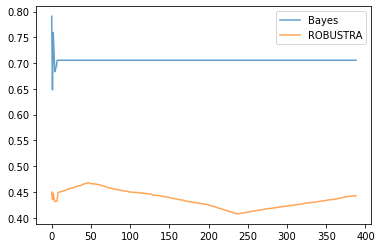

In [182]:
exp1.plot()